## **Programming for Data Science - Lập Trình cho khoa học dữ liệu**
### **HCMUS - Trường Đại học khoa học tự nhiên - Nov 2024.**
### **Final Project - Handle Kaggle Dataset Problems**
#### **Due:** 16/12/2024.
#### **Lớp:** 22_21.
#### **Giảng viên hướng dẫn:** Thầy Phạm Trọng Nghĩa - Thầy Lê Nhựt Nam.
#### **Tên Nhóm:** 3TT
#### **MSSV - Tên thành viên:**
1. 22120384 - Nguyễn Đình Trí.
2. 22120398 - Vũ Hoàng Nhật Trường.
3. 22120412 - Nguyễn Anh Tường.
---
### STEP 3: DATA EXPLORATION
#### **Người thực hiện:** 
- Nguyễn Đình Trí - 22120384.

- Vũ Hoàng Nhật Trường - 22120398.

---

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Data/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### __1. Góc nhìn sức khỏe cá nhân (Health Profile Analysis)__

 ##### _Mục tiêu_: Hiểu rõ hơn về các yếu tố sức khỏe cá nhân và lối sống ảnh hưởng đến tình trạng sức khỏe, đặc biệt là bệnh tim.

#### 1. Chỉ số BMI có liên quan đến tỉ lệ mắc bệnh tim không?

C:\Users\hoang\AppData\Local\Temp\ipykernel_9556\277577175.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y='BMI', data=df, palette='Set2')


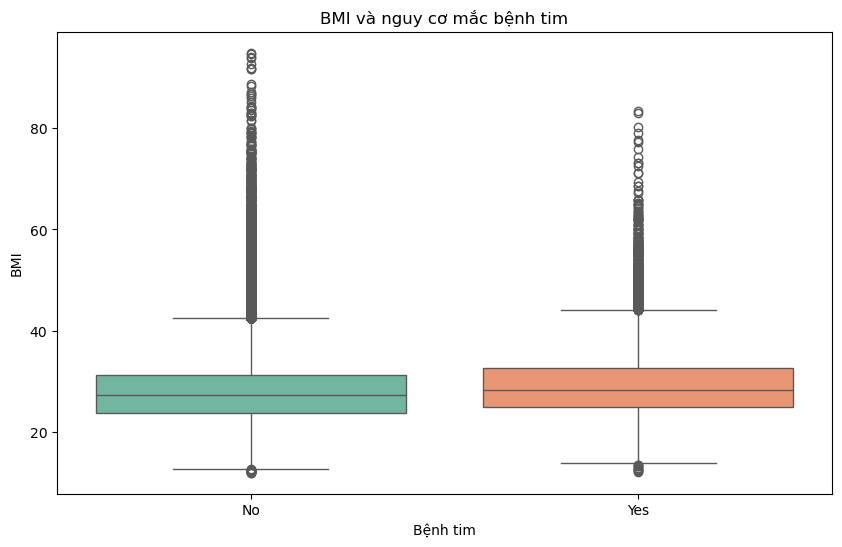

BMI trung bình - Có bệnh tim: 29.401592079786653
BMI trung bình - Không có bệnh tim: 28.224658336240093


In [3]:
# Vẽ boxplot cho BMI và bệnh tim
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='BMI', data=df, palette='Set2')
plt.title('BMI và nguy cơ mắc bệnh tim')
plt.xlabel('Bệnh tim')
plt.ylabel('BMI')
plt.show()

# Tính toán trung bình BMI giữa hai nhóm
mean_bmi_heart_disease = df[df['HeartDisease'] == 'Yes']['BMI'].mean()
mean_bmi_no_heart_disease = df[df['HeartDisease'] == 'No']['BMI'].mean()
print(f"BMI trung bình - Có bệnh tim: {mean_bmi_heart_disease}")
print(f"BMI trung bình - Không có bệnh tim: {mean_bmi_no_heart_disease}")

### ___Nhận xét___
#### _1.1 Phân bố BMI giữa hai nhóm (Yes/No):_
  - *Nhóm "No" (không mắc bệnh tim):*
    - Giá trị trung vị (median) BMI của nhóm này nằm ở mức trung bình, khoảng từ 20-30.
    - Phân phối có sự hiện diện của nhiều outliers (các điểm ngoài phạm vi thông thường), đặc biệt ở phía trên (BMI > 40).
  
  - *Nhóm "Yes" (mắc bệnh tim):*
    - Trung vị BMI của nhóm này cũng nằm ở mức tương tự như nhóm "No" (khoảng 20-30).
    - Phân phối cũng có outliers tương tự, nhưng mức độ outliers (điểm trên cao) có vẻ ít hơn nhóm "No".

#### _1.2 Sự khác biệt giữa hai nhóm:_
  - Hai nhóm "Yes" và "No" có phân phối BMI tương đối giống nhau, với khoảng giá trị gần như tương đồng. Tuy nhiên:
    - Nhóm "Yes" có xu hướng ít outliers hơn ở các mức BMI cao so với nhóm "No".
    - Phạm vi BMI của hai nhóm khá tương đồng, điều này cho thấy BMI có thể không phải là yếu tố duy nhất ảnh hưởng đến nguy cơ mắc bệnh tim trong tập dữ liệu này.

#### _1.3 Khả năng liên hệ giữa BMI và nguy cơ mắc bệnh tim:_
  - Dựa trên biểu đồ, khó có thể khẳng định BMI có tác động lớn đến nguy cơ mắc bệnh tim, vì không có sự khác biệt rõ ràng giữa hai nhóm.
  - Có thể cần kết hợp thêm các yếu tố khác (như huyết áp, cholesterol, lối sống, ...) để đánh giá toàn diện hơn về nguy cơ mắc bệnh tim.


#### 2. Số giờ ngủ có ảnh hưởng đến tình trạng sức khỏe tổng quát như thế nào?

C:\Users\hoang\AppData\Local\Temp\ipykernel_9556\2559377458.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GenHealth', y='SleepTime', data=df, palette='Set3')


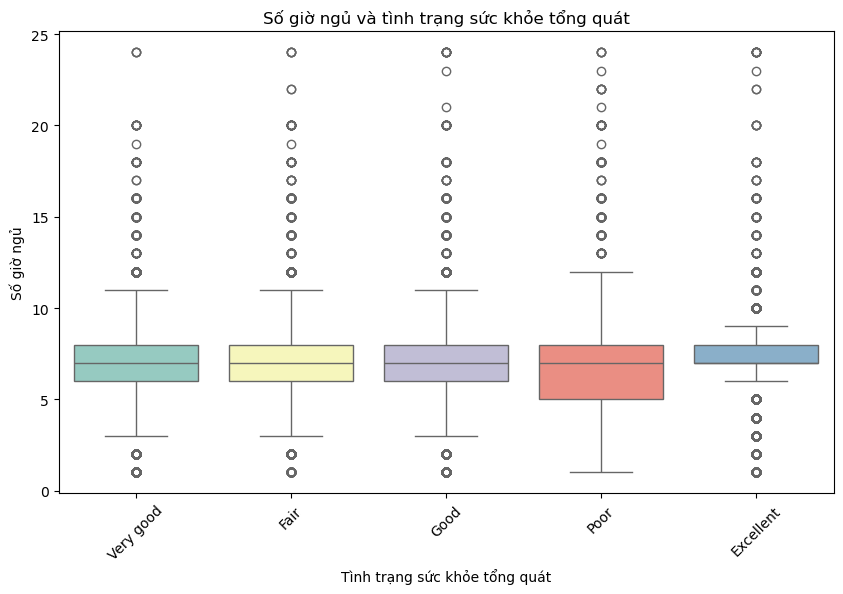

Số giờ ngủ trung bình theo tình trạng sức khỏe:
GenHealth
Excellent    7.205514
Fair         6.928569
Good         7.066327
Poor         6.848791
Very good    7.134501
Name: SleepTime, dtype: float64


In [4]:
# Vẽ boxplot cho số giờ ngủ và tình trạng sức khỏe
plt.figure(figsize=(10, 6))
sns.boxplot(x='GenHealth', y='SleepTime', data=df, palette='Set3')
plt.title('Số giờ ngủ và tình trạng sức khỏe tổng quát')
plt.xlabel('Tình trạng sức khỏe tổng quát')
plt.ylabel('Số giờ ngủ')
plt.xticks(rotation=45)
plt.show()

# Tính toán số giờ ngủ trung bình theo tình trạng sức khỏe
sleep_by_health = df.groupby('GenHealth')['SleepTime'].mean()
print("Số giờ ngủ trung bình theo tình trạng sức khỏe:")
print(sleep_by_health)

### ___Nhận xét___
#### *2.1 Phân phối số giờ ngủ theo từng mức độ sức khỏe:*
  - Very good, Fair, Good, Poor, Excellent:
    - *Trung vị (median):*
        - Số giờ ngủ trung vị của các nhóm nằm trong khoảng từ 6 đến 8 giờ, đây là mức ngủ phổ biến.
    - *Độ trải rộng (IQR - Interquartile Range):*
        - Các nhóm có mức độ phân tán số giờ ngủ tương tự nhau, với hầu hết số giờ ngủ nằm trong khoảng 5-9 giờ.
    - *Outliers:*
        - Tất cả các nhóm đều có các outliers (những người ngủ ít hơn 4 giờ hoặc nhiều hơn 10 giờ), đặc biệt có một số trường hợp ngủ rất nhiều (hơn 20 giờ).
#### *2.2 Sự khác biệt giữa các mức độ sức khỏe:*
  - *Nhóm "Poor" (sức khỏe kém):*
    - Nhóm này có độ trải rộng số giờ ngủ lớn hơn một chút, cho thấy những người trong nhóm này có thể có giấc ngủ không ổn định, cả ở mức ngủ ít và ngủ nhiều.
    - *Nhóm "Excellent" (sức khỏe rất tốt):*
    - Trung vị của số giờ ngủ ở nhóm này dường như thấp hơn một chút (gần 6 giờ), điều này có thể gợi ý rằng những người có sức khỏe rất tốt không nhất thiết ngủ nhiều, mà có thể do chất lượng giấc ngủ cao.

#### *2.3 Xu hướng liên quan giữa sức khỏe và số giờ ngủ:*
  - Không có sự khác biệt rõ ràng về số giờ ngủ giữa các nhóm sức khỏe tổng quát, nhưng có một vài quan sát:
    - Sức khỏe tốt không chỉ phụ thuộc vào số giờ ngủ mà còn phụ thuộc vào chất lượng giấc ngủ hoặc các yếu tố khác như lối sống, chế độ ăn uống, và vận động.
    - Nhóm "Poor" có xu hướng bao gồm nhiều người với số giờ ngủ nằm ở cả hai thái cực (ngủ quá ít hoặc quá nhiều), điều này có thể phản ánh tình trạng sức khỏe kém liên quan đến rối loạn giấc ngủ.

#### 3. Mối liên hệ giữa BMI, thói quen hút thuốc và bệnh tim

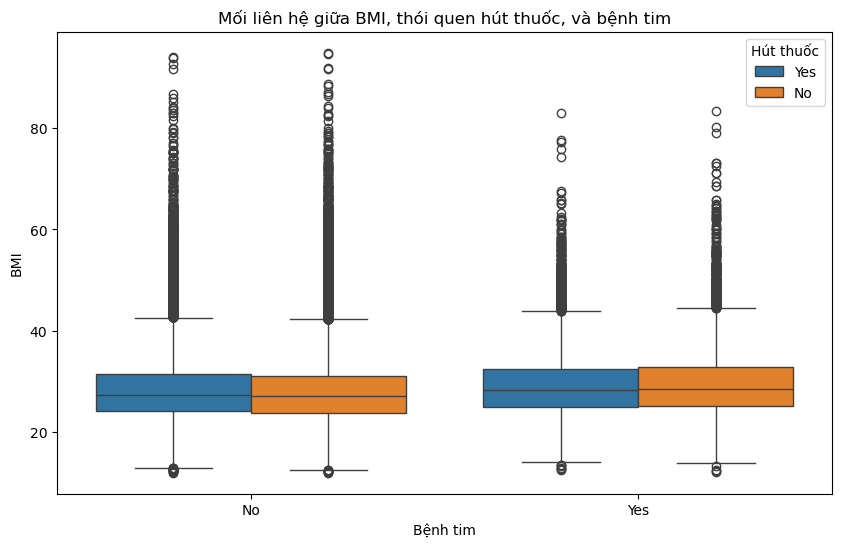

In [5]:
# Vẽ boxplot cho BMI và bệnh tim, phân nhóm theo thói quen hút thuốc
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='BMI', hue='Smoking', data=df)
plt.title('Mối liên hệ giữa BMI, thói quen hút thuốc, và bệnh tim')
plt.xlabel('Bệnh tim')
plt.ylabel('BMI')
plt.legend(title='Hút thuốc')
plt.show()

### ___Nhận xét___
#### *3.1. Phân phối BMI theo nhóm bệnh tim và thói quen hút thuốc:*
- *Nhóm không mắc bệnh tim ("No"):*
  - *Người hút thuốc (Yes):*
    - Trung vị BMI của nhóm này nằm trong khoảng 20-30.
    - Phân bố BMI của nhóm hút thuốc có vẻ tương tự với nhóm không hút thuốc, nhưng có thể xuất hiện một số giá trị outliers (BMI cao) ở phía trên.
  - *Người không hút thuốc (No):*
    - Trung vị BMI cũng tương tự, không khác biệt đáng kể so với nhóm hút thuốc.
    - Số lượng outliers (BMI rất cao) ở nhóm này có vẻ hơi nhiều hơn so với nhóm hút thuốc.

- *Nhóm mắc bệnh tim ("Yes"):*
  - *Người hút thuốc (Yes):*
    - Trung vị BMI tương đương nhóm "No" (không mắc bệnh tim), nằm trong khoảng 20-30.
    - Nhóm này có outliers ở phía BMI cao, nhưng không đáng kể hơn nhóm không hút thuốc.
  - *Người không hút thuốc (No):*
    - Trung vị BMI cũng tương tự nhóm hút thuốc, không có sự khác biệt lớn.
    - Phân phối BMI không thay đổi nhiều so với nhóm không mắc bệnh tim.
#### *3.2. Sự khác biệt giữa các nhóm:*
- *BMI giữa nhóm "No" và "Yes" (bệnh tim):*
  - Không có sự khác biệt lớn về trung vị BMI giữa người mắc và không mắc bệnh tim. Nghĩa là BMI không phải là yếu tố duy nhất ảnh hưởng đến nguy cơ bệnh tim.
- *Ảnh hưởng của hút thuốc:*
  - Sự khác biệt giữa nhóm hút thuốc và không hút thuốc là rất nhỏ trong cả hai nhóm bệnh tim và không bệnh tim. Điều này cho thấy, thói quen hút thuốc không tạo ra sự chênh lệch lớn về BMI.
#### *3.3. Outliers và phân phối:*
- Outliers xuất hiện ở cả hai nhóm (mắc bệnh tim và không mắc bệnh tim), đặc biệt là ở các giá trị BMI rất cao (>40).
- Nhóm "Yes" (mắc bệnh tim) có vẻ có ít outliers hơn một chút so với nhóm "No", điều này có thể do số lượng mẫu hoặc đặc điểm của tập dữ liệu.

#### *Kết luận:*
- *BMI:* Không có sự khác biệt lớn về BMI giữa nhóm mắc và không mắc bệnh tim, cũng như giữa nhóm hút thuốc và không hút thuốc.
- *Hút thuốc:* Trong biểu đồ này, hút thuốc dường như không có tác động đáng kể đến chỉ số BMI hoặc sự khác biệt giữa các nhóm bệnh tim.


#### 4. Số giờ ngủ và sức khỏe tinh thần có quan hệ gì đối với bệnh tiểu đường không?

c:\Users\hoang\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


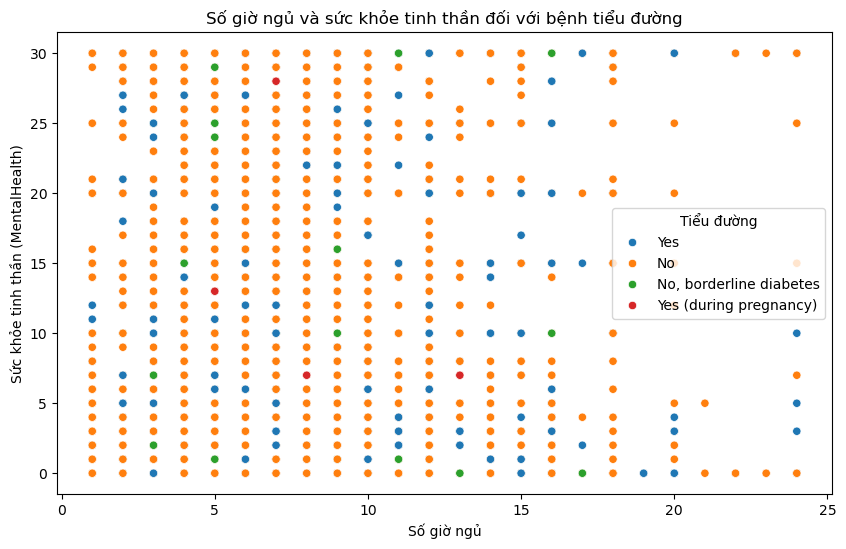

In [6]:
# Scatterplot giữa số giờ ngủ và sức khỏe tinh thần
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SleepTime', y='MentalHealth', hue='Diabetic', data=df)
plt.title('Số giờ ngủ và sức khỏe tinh thần đối với bệnh tiểu đường')
plt.xlabel('Số giờ ngủ')
plt.ylabel('Sức khỏe tinh thần (MentalHealth)')
plt.legend(title='Tiểu đường')
plt.show()

### ___Nhận xét___
#### *4.1. Phân bố số giờ ngủ và sức khỏe tinh thần:*
- *Số giờ ngủ:*
  - Phân bố trải dài từ 0 đến khoảng 24 giờ, nhưng tập trung chủ yếu trong khoảng 5-10 giờ, điều này phản ánh khoảng ngủ phổ biến trong dân số.
- *Sức khỏe tinh thần:*
  - Giá trị sức khỏe tinh thần (MentalHealth) dao động từ 0 (tinh thần tốt) đến 30 (sức khỏe tinh thần rất kém). Phân phối rải đều, nhưng có nhiều điểm tập trung ở mức dưới 10.
#### *4.2. Mối quan hệ giữa sức khỏe tinh thần và bệnh tiểu đường:*
- *Nhóm "No" (không mắc tiểu đường):*
  - Đây là nhóm chiếm đa số (màu cam). Hầu hết phân bố của nhóm này tập trung trong khoảng 5-10 giờ ngủ và sức khỏe tinh thần khá tốt (MentalHealth < 10).
- *Nhóm "Yes" (mắc tiểu đường):*
  - Nhóm này (màu xanh dương) xuất hiện ở nhiều khoảng sức khỏe tinh thần (từ 0 đến 30). Tuy nhiên, họ có vẻ phân bố tương tự về số giờ ngủ với nhóm "No".
- *Nhóm "No, borderline diabetes" (tiền tiểu đường):*
  - Nhóm này (màu xanh lá) có phân bố tương đối ít và tập trung vào vùng sức khỏe tinh thần tốt hơn (thấp hơn 15), điều này có thể phản ánh mức độ ảnh hưởng thấp hơn so với người mắc bệnh tiểu đường hoàn toàn.
- *Nhóm "Yes (during pregnancy)" (mắc tiểu đường trong thai kỳ):*
  - Nhóm này (màu đỏ) có số lượng rất ít, khó nhận xét chung. Tuy nhiên, một số điểm xuất hiện ở mức sức khỏe tinh thần cao (MentalHealth > 15).
#### *4.3. Tác động tiềm năng:*
- *Số giờ ngủ và sức khỏe tinh thần:*
  - Có một số điểm bất thường, ví dụ: những người ngủ quá ít (0-2 giờ) hoặc quá nhiều (20-24 giờ) thường có sức khỏe tinh thần kém hơn (MentalHealth cao).
- *Bệnh tiểu đường:*
  - Không có sự khác biệt rõ ràng về số giờ ngủ giữa các nhóm bệnh tiểu đường. Tuy nhiên, những người mắc tiểu đường hoặc tiền tiểu đường có xu hướng xuất hiện ở các giá trị sức khỏe tinh thần cao hơn (kém hơn).
  - Tiểu đường trong thai kỳ (Yes during pregnancy) dường như không bị ảnh hưởng mạnh mẽ bởi số giờ ngủ, nhưng sức khỏe tinh thần có thể chịu ảnh hưởng.
#### *4.4. Kết luận:*
- *Số giờ ngủ:* Ngủ quá ít hoặc quá nhiều có thể liên quan đến sức khỏe tinh thần kém, bất kể trạng thái bệnh tiểu đường.
- *Sức khỏe tinh thần:* Những người mắc tiểu đường có vẻ dễ có sức khỏe tinh thần kém hơn so với người không mắc.

#### 5. Mối quan hệ giữa vận động thể chất và bệnh tim?

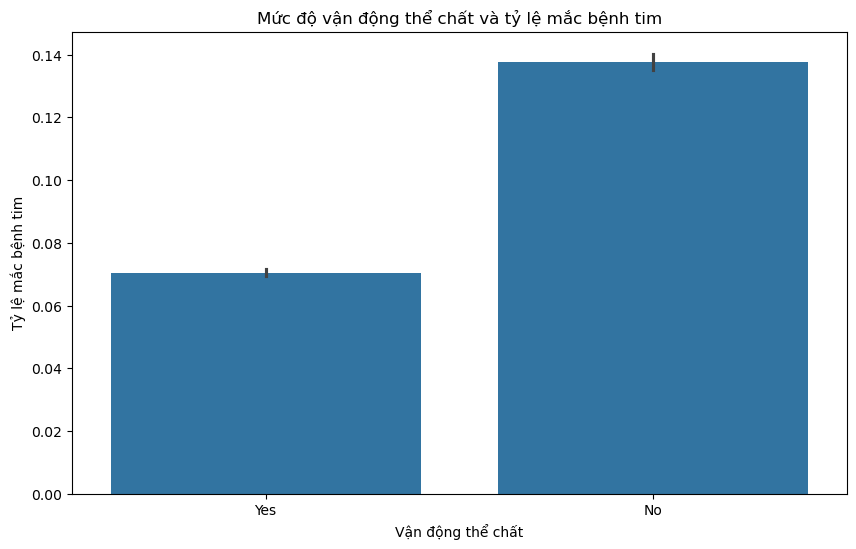

In [7]:
df['HeartDisease_Binary'] = df['HeartDisease'].apply(lambda x: 1 if x == 'Yes' else 0)

# Vẽ barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='PhysicalActivity', 
    y='HeartDisease_Binary', 
    data=df, 
    estimator=lambda x: sum(x)/len(x)  # Tính tỷ lệ (số 'Yes' chia tổng)
)
plt.title('Mức độ vận động thể chất và tỷ lệ mắc bệnh tim')
plt.xlabel('Vận động thể chất')
plt.ylabel('Tỷ lệ mắc bệnh tim')
plt.show()

### ___Nhận xét___
#### *5.1. So sánh tỷ lệ mắc bệnh tim giữa hai nhóm:*
- *Nhóm có vận động thể chất ("Yes"):*
  - Tỷ lệ mắc bệnh tim thấp hơn đáng kể so với nhóm không vận động.
  - Điều này cho thấy vận động thể chất có thể là một yếu tố quan trọng trong việc giảm nguy cơ mắc bệnh tim.
- *Nhóm không vận động thể chất ("No"):*
  - Tỷ lệ mắc bệnh tim cao hơn đáng kể so với nhóm vận động.
  - Sự khác biệt này có thể là do lối sống ít vận động làm gia tăng các yếu tố nguy cơ, chẳng hạn như béo phì, huyết áp cao, hoặc mức cholesterol không lành mạnh.
#### *5.2. Mối quan hệ giữa vận động và bệnh tim:*
- Biểu đồ thể hiện một xu hướng rõ ràng rằng việc vận động thể chất thường xuyên có liên quan đến tỷ lệ mắc bệnh tim thấp hơn.
- Mặc dù đây là một mối quan hệ tổng quan, cần lưu ý rằng:
  - Vận động thể chất có thể chỉ là một trong nhiều yếu tố ảnh hưởng (bao gồm chế độ ăn uống, di truyền, mức độ căng thẳng, v.v.).
  - Có thể cần phân tích thêm để kiểm tra các yếu tố liên quan khác.
#### *5.3. Ý nghĩa của kết quả:*
- Kết quả này phù hợp với các nghiên cứu khoa học cho rằng vận động thể chất có lợi ích lớn trong việc duy trì sức khỏe tim mạch.
- Đối với các chương trình sức khỏe cộng đồng, việc khuyến khích người dân tăng cường vận động thể chất có thể là một chiến lược hiệu quả để giảm tỷ lệ mắc bệnh tim.

#### 6. Tình trạng sức khỏe tổng quát có ảnh hưởng đến khó khăn khi đi lại không?

<Figure size 1000x600 with 0 Axes>

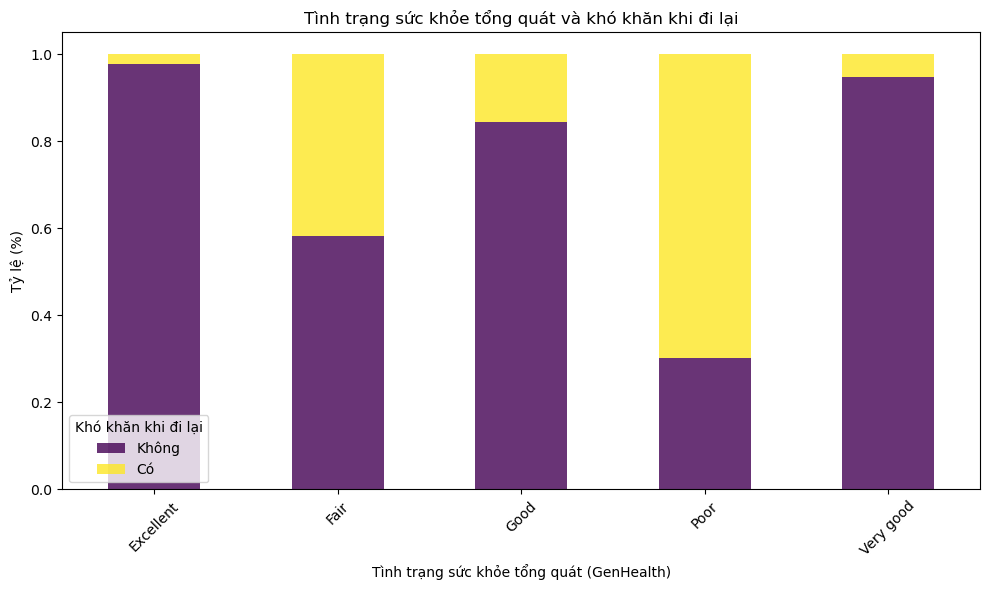

In [8]:
# Tính tỷ lệ khó khăn khi đi lại theo tình trạng sức khỏe tổng quát
genhealth_diffwalking = df.groupby('GenHealth')['DiffWalking'].value_counts(normalize=True).unstack()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
genhealth_diffwalking.plot(kind='bar', stacked=True, figsize=(10, 6), alpha=0.8, colormap='viridis')
plt.title('Tình trạng sức khỏe tổng quát và khó khăn khi đi lại')
plt.xlabel('Tình trạng sức khỏe tổng quát (GenHealth)')
plt.ylabel('Tỷ lệ (%)')
plt.legend(title='Khó khăn khi đi lại', labels=['Không', 'Có'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### ___Nhận xét___
#### *6.1. Tỷ lệ khó khăn khi đi lại trong từng nhóm sức khỏe tổng quát:*
- *Nhóm "Excellent" (xuất sắc):*
  - Gần như toàn bộ (gần 100%) không gặp khó khăn khi đi lại (màu tím).
  - Điều này phản ánh rằng những người có sức khỏe tổng quát tốt rất ít khả năng gặp vấn đề về đi lại.
- *Nhóm "Very good" và "Good":*
  - Đa số vẫn không gặp khó khăn khi đi lại (màu tím), nhưng tỷ lệ những người gặp khó khăn (màu vàng) tăng nhẹ so với nhóm "Excellent".
  - Điều này có thể cho thấy một mối liên hệ giữa sức khỏe tổng quát kém hơn một chút và khả năng di chuyển bị ảnh hưởng.
- *Nhóm "Fair" (trung bình):*
  - Có sự gia tăng đáng kể về tỷ lệ những người gặp khó khăn khi đi lại (màu vàng), khoảng hơn 50%.
  - Nhóm này cho thấy sự suy giảm sức khỏe tổng quát có liên quan rõ ràng đến vấn đề đi lại.
- *Nhóm "Poor" (kém):*
  - Hầu hết (khoảng 80-90%) gặp khó khăn khi đi lại (màu vàng).
  - Đây là nhóm có tỷ lệ khó khăn khi đi lại cao nhất, phù hợp với việc sức khỏe tổng quát yếu ảnh hưởng nghiêm trọng đến khả năng di chuyển.
#### *6.2. Xu hướng tổng thể:*
- Khi tình trạng sức khỏe tổng quát giảm từ "Excellent" xuống "Poor," tỷ lệ người gặp khó khăn khi đi lại tăng rõ rệt.
- Nhóm có sức khỏe tổng quát tốt ("Excellent" và "Very good") gần như không gặp khó khăn khi đi lại, trong khi nhóm có sức khỏe kém hơn ("Fair" và "Poor") chịu ảnh hưởng nặng nề hơn về khả năng di chuyển.
#### *6.3. Ý nghĩa:*
- *Tác động của sức khỏe tổng quát:* 
  - Tình trạng sức khỏe tổng quát là yếu tố quan trọng ảnh hưởng đến khả năng vận động. Những người có sức khỏe kém dễ gặp khó khăn khi di chuyển, điều này có thể ảnh hưởng đến chất lượng cuộc sống và khả năng tham gia các hoạt động hàng ngày.
- *Ứng dụng trong chăm sóc sức khỏe:* 
  - Nhóm có sức khỏe kém cần được hỗ trợ đặc biệt, chẳng hạn như vật lý trị liệu, thiết bị hỗ trợ di chuyển, hoặc các chương trình cải thiện sức khỏe tổng quát.

#### 7. So sánh số ngày sức khỏe tinh thần không tốt giữa người uống và không uống rượu

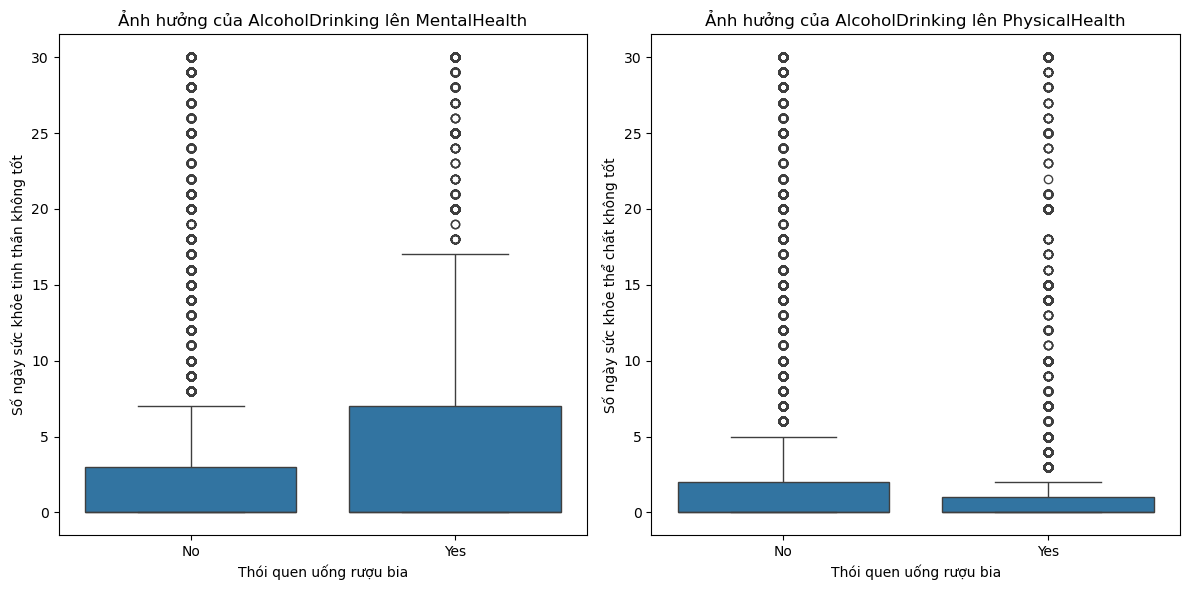

In [9]:
# So sánh số ngày sức khỏe tinh thần không tốt giữa người uống và không uống rượu
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='AlcoholDrinking', y='MentalHealth', data=df)
plt.title('Ảnh hưởng của AlcoholDrinking lên MentalHealth')
plt.xlabel('Thói quen uống rượu bia')
plt.ylabel('Số ngày sức khỏe tinh thần không tốt')

plt.subplot(1, 2, 2)
sns.boxplot(x='AlcoholDrinking', y='PhysicalHealth', data=df)
plt.title('Ảnh hưởng của AlcoholDrinking lên PhysicalHealth')
plt.xlabel('Thói quen uống rượu bia')
plt.ylabel('Số ngày sức khỏe thể chất không tốt')

plt.tight_layout()
plt.show()

### ___Nhận xét___
#### *7.1. Ảnh hưởng lên sức khỏe tinh thần (MentalHealth):*
- *Nhóm không uống rượu bia ("No"):*
  - Trung vị (median) của số ngày sức khỏe tinh thần không tốt khá thấp, khoảng 2-3 ngày.
  - Khoảng phân bố dữ liệu (IQR) cũng tương đối hẹp, đa số rơi vào khoảng 0-5 ngày.
  - Có một số outliers (các điểm nằm ngoài khoảng thông thường), nhưng không phổ biến.
- *Nhóm uống rượu bia ("Yes"):*
  - Trung vị số ngày sức khỏe tinh thần không tốt cao hơn so với nhóm "No", khoảng 4-5 ngày.
  - Khoảng phân bố dữ liệu (IQR) rộng hơn, cho thấy nhiều người trong nhóm này gặp vấn đề sức khỏe tinh thần kéo dài hơn.
  - Có nhiều outliers hơn, đặc biệt ở các giá trị số ngày không tốt rất cao (gần 30 ngày).
#### *Nhận xét:*
- Nhóm có thói quen uống rượu bia có sức khỏe tinh thần kém hơn rõ rệt so với nhóm không uống.
- Thói quen uống rượu bia có thể là một yếu tố góp phần gây ra các vấn đề về sức khỏe tinh thần như căng thẳng, lo âu hoặc trầm cảm.
#### *7.2. Ảnh hưởng lên sức khỏe thể chất (PhysicalHealth):*
- *Nhóm không uống rượu bia ("No"):*
  - Trung vị số ngày sức khỏe thể chất không tốt khá thấp, khoảng 1-2 ngày.
  - Khoảng phân bố dữ liệu (IQR) rất hẹp, đa số rơi vào khoảng 0-5 ngày.
  - Có một số outliers, nhưng tương đối ít.
- *Nhóm uống rượu bia ("Yes"):*
  - Trung vị số ngày sức khỏe thể chất không tốt tương đương hoặc thấp hơn một chút so với nhóm không uống (khoảng 1-2 ngày).
  - Khoảng phân bố dữ liệu tương tự với nhóm không uống, cho thấy thói quen uống rượu bia không có ảnh hưởng lớn đến sức khỏe thể chất trong tập dữ liệu này.
#### *Nhận xét:*
- Thói quen uống rượu bia không có ảnh hưởng rõ ràng đến sức khỏe thể chất, hoặc ít nhất không khác biệt đáng kể so với nhóm không uống.
- Điều này có thể phụ thuộc vào mức độ tiêu thụ rượu bia (nhẹ, vừa phải, hay lạm dụng) mà biểu đồ này không phản ánh được.
#### *7.3. Tổng quan và so sánh:*
- *Sức khỏe tinh thần:* Nhóm uống rượu bia bị ảnh hưởng tiêu cực hơn so với nhóm không uống. Thói quen uống rượu bia có thể liên quan đến các vấn đề tâm lý.
- *Sức khỏe thể chất:* Không có sự khác biệt rõ ràng giữa hai nhóm, cho thấy ảnh hưởng của rượu bia lên sức khỏe thể chất có thể không đáng kể trong tập dữ liệu này.


#### 8. Mối quan hệ giữa thời gian ngủ và người hút thuốc?

C:\Users\hoang\AppData\Local\Temp\ipykernel_9556\3185436235.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Smoking', y='SleepTime', data=df, ci=None, palette='Set2')
C:\Users\hoang\AppData\Local\Temp\ipykernel_9556\3185436235.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Smoking', y='SleepTime', data=df, ci=None, palette='Set2')


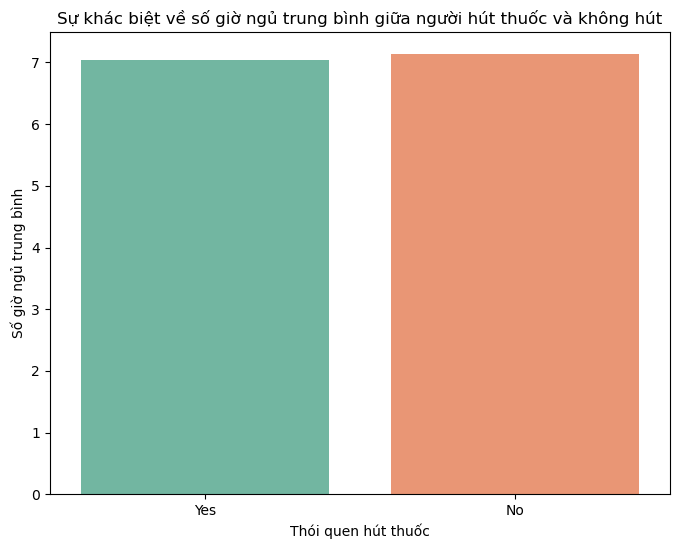

In [10]:
# Tính trung bình số giờ ngủ giữa hai nhóm
smoking_sleep = df.groupby('Smoking')['SleepTime'].mean()

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
sns.barplot(x='Smoking', y='SleepTime', data=df, ci=None, palette='Set2')
plt.title('Sự khác biệt về số giờ ngủ trung bình giữa người hút thuốc và không hút')
plt.xlabel('Thói quen hút thuốc')
plt.ylabel('Số giờ ngủ trung bình')
plt.show()

### ___Nhận xét___
#### *8.1. Sự khác biệt về số giờ ngủ trung bình:*
- *Nhóm hút thuốc ("Yes"):*
  - Số giờ ngủ trung bình xấp xỉ *7 giờ*.
- *Nhóm không hút thuốc ("No"):*
  - Số giờ ngủ trung bình cũng xấp xỉ *7 giờ*.
- *So sánh:* 
  - Số giờ ngủ trung bình giữa hai nhóm gần như không có sự khác biệt đáng kể.
#### *8.2. Nhận xét về ảnh hưởng của thói quen hút thuốc:*
- *Không có sự khác biệt lớn:* 
  - Dữ liệu cho thấy thói quen hút thuốc dường như không ảnh hưởng nhiều đến thời lượng ngủ trung bình hàng ngày của một người.
- *Chất lượng giấc ngủ (không được thể hiện):*
  - Mặc dù thời lượng ngủ không khác biệt, nhưng chất lượng giấc ngủ có thể khác nhau giữa hai nhóm. Những người hút thuốc có thể bị ảnh hưởng bởi các vấn đề như khó thở, gián đoạn giấc ngủ, hoặc chất lượng giấc ngủ kém hơn, điều này không được phản ánh trong dữ liệu.
#### *8.3. Kết luận:*
- Số giờ ngủ trung bình giữa người hút thuốc và không hút thuốc là tương đồng (~7 giờ).
- Chưa thể kết luận về tác động của hút thuốc đối với giấc ngủ chỉ dựa trên thời lượng ngủ; cần bổ sung thêm các phân tích về chất lượng giấc ngủ hoặc các yếu tố sức khỏe liên quan.

#### 9. Mối quan hệ giữa chỉ số BMI và tình trạng ung thư da?

C:\Users\hoang\AppData\Local\Temp\ipykernel_9556\3733226909.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='SkinCancer', y='BMI', data=df, ci=None, palette='Set3')
C:\Users\hoang\AppData\Local\Temp\ipykernel_9556\3733226909.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SkinCancer', y='BMI', data=df, ci=None, palette='Set3')


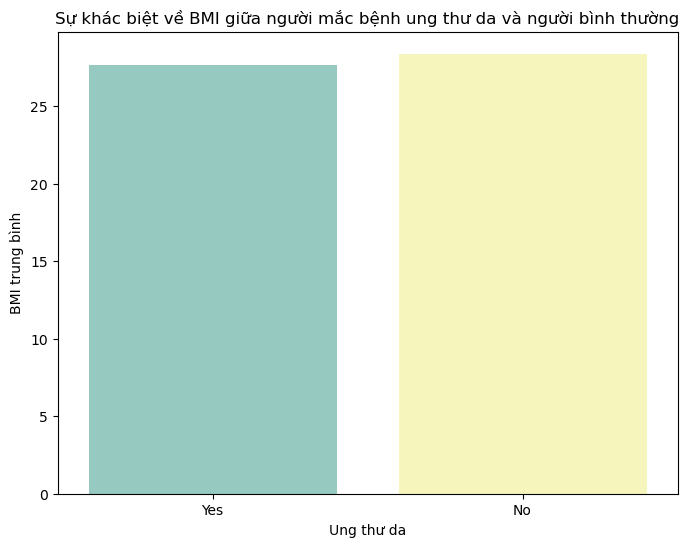

In [11]:
# Tính BMI trung bình theo tình trạng ung thư da
skincancer_bmi = df.groupby('SkinCancer')['BMI'].mean()

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
sns.barplot(x='SkinCancer', y='BMI', data=df, ci=None, palette='Set3')
plt.title('Sự khác biệt về BMI giữa người mắc bệnh ung thư da và người bình thường')
plt.xlabel('Ung thư da')
plt.ylabel('BMI trung bình')
plt.show()


### ___Nhận xét___
#### *9.1. So sánh BMI trung bình giữa hai nhóm:*
- *Nhóm mắc bệnh ung thư da ("Yes"):*
  - BMI trung bình của nhóm này ở mức khoảng *25-26*.
- *Nhóm không mắc bệnh ung thư da ("No"):*
  - BMI trung bình của nhóm này tương tự, cũng ở mức *25-26*.
- *So sánh:* 
  - Không có sự khác biệt đáng kể giữa BMI trung bình của hai nhóm. Điều này cho thấy BMI có thể không phải là yếu tố chính ảnh hưởng đến việc mắc bệnh ung thư da.
#### *9.2. Nhận xét về mối liên hệ giữa BMI và ung thư da:*
- *Không có sự khác biệt rõ rệt:* 
  - Biểu đồ không chỉ ra mối liên hệ mạnh mẽ giữa BMI và nguy cơ mắc ung thư da.
- *Yếu tố khác cần xem xét:* 
  - Ung thư da thường liên quan đến các yếu tố khác như tiếp xúc với ánh nắng mặt trời (UV), di truyền, và lối sống, thay vì chỉ số BMI.
#### *9.3. Kết luận:*
- BMI trung bình của nhóm mắc bệnh và không mắc bệnh ung thư da là tương đồng.
- Cần thêm các phân tích sâu hơn với các yếu tố khác để hiểu rõ nguyên nhân và nguy cơ liên quan đến ung thư da.


#### 10. So sánh tỉ lệ mắc bệnh tim của những người có tiền sử bị và không bị đột quỵ?

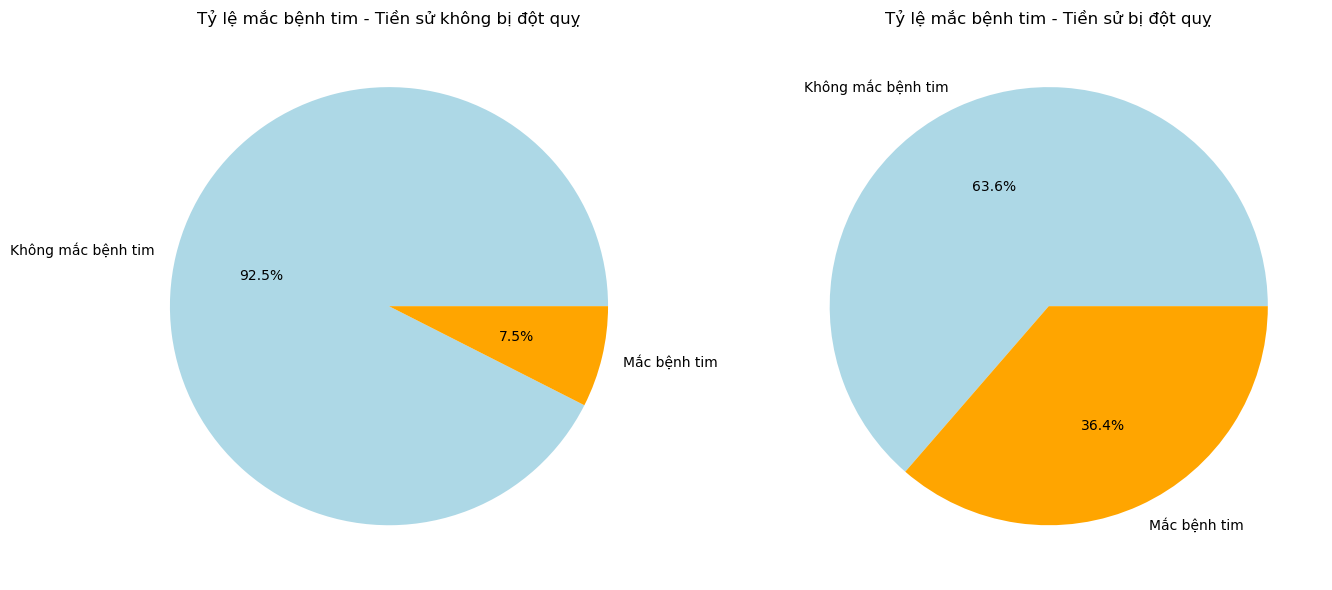

In [12]:
# Tính tỷ lệ phần trăm mắc bệnh tim trong từng nhóm
stroke_heart = pd.crosstab(df['Stroke'], df['HeartDisease'])
stroke_heart_percentage = stroke_heart.div(stroke_heart.sum(axis=1), axis=0) * 100

# Lấy dữ liệu cho từng nhóm
labels = ['Không mắc bệnh tim', 'Mắc bệnh tim']
stroke_no = stroke_heart_percentage.loc['No']
stroke_yes = stroke_heart_percentage.loc['Yes']

# Vẽ biểu đồ tròn cho nhóm không bị đột quỵ
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.pie(stroke_no, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'orange'])
plt.title('Tỷ lệ mắc bệnh tim - Tiền sử không bị đột quỵ')

# Vẽ biểu đồ tròn cho nhóm bị đột quỵ
plt.subplot(1, 2, 2)
plt.pie(stroke_yes, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'orange'])
plt.title('Tỷ lệ mắc bệnh tim - Tiền sử bị đột quỵ')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

### ___Nhận xét___
#### *10.1. Tỷ lệ mắc bệnh tim trong nhóm không có tiền sử đột quỵ:*
- *Không mắc bệnh tim:* Chiếm *92.5%*, phần lớn trong nhóm này không bị bệnh tim.
- *Mắc bệnh tim:* Chỉ chiếm *7.5%*, cho thấy tỷ lệ mắc bệnh tim ở nhóm này là rất thấp.
#### *10.2. Tỷ lệ mắc bệnh tim trong nhóm có tiền sử đột quỵ:*
- *Không mắc bệnh tim:* Chiếm *63.6%*, giảm đáng kể so với nhóm không có tiền sử đột quỵ.
- *Mắc bệnh tim:* Chiếm *36.4%*, cao hơn nhiều so với nhóm không có tiền sử đột quỵ.
#### *10.3. So sánh giữa hai nhóm:*
- *Nguy cơ mắc bệnh tim cao hơn rõ rệt ở nhóm có tiền sử đột quỵ:*
  - Tỷ lệ mắc bệnh tim ở nhóm có tiền sử đột quỵ (36.4%) cao gấp nhiều lần so với nhóm không có tiền sử đột quỵ (7.5%).
  - Điều này cho thấy đột quỵ có thể là một yếu tố nguy cơ lớn đối với bệnh tim, hoặc cả hai bệnh lý này có thể liên quan đến các yếu tố nguy cơ chung như cao huyết áp, tiểu đường, hoặc lối sống không lành mạnh.
- *Nhóm không có tiền sử đột quỵ:* 
  - Tỷ lệ mắc bệnh tim thấp hơn rất nhiều, điều này có thể do nhóm này ít tiếp xúc với các yếu tố nguy cơ liên quan hoặc có sức khỏe tim mạch tốt hơn.
#### *10.4. Ý nghĩa và ứng dụng:*
- *Nhóm có tiền sử đột quỵ cần được chú ý đặc biệt:*
  - Những người từng bị đột quỵ có nguy cơ cao mắc bệnh tim. Điều này gợi ý rằng cần có các biện pháp quản lý và điều trị phù hợp để giảm nguy cơ mắc thêm bệnh lý tim mạch.
- *Tầm quan trọng của phòng ngừa:* 
  - Việc kiểm soát các yếu tố nguy cơ chung như huyết áp, cholesterol, cân nặng, và lối sống là rất quan trọng để giảm nguy cơ cả đột quỵ và bệnh tim.

### __2. Góc nhìn cộng đồng và yếu tố nhân khẩu học (Demographic and Population Insights)__

 ##### _Mục tiêu_: Tìm hiểu sự khác biệt về sức khỏe giữa các nhóm dân số và xác định những yếu tố nguy cơ đặc trưng.

#### 1. Nam và nữ có nguy cơ mắc bệnh tim như thế nào?

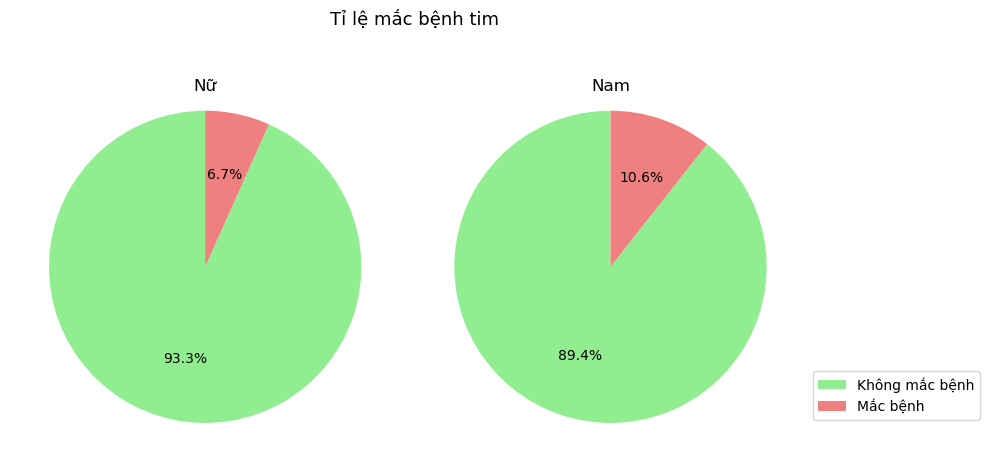

In [14]:
sex_heart = pd.crosstab(df['Sex'], df['HeartDisease'])
sex_heart_percentage = sex_heart.div(sex_heart.sum(axis=1),axis=0) * 100

female_heart = sex_heart_percentage.loc['Female']
male_heart = sex_heart_percentage.loc['Male']

label = ["Không mắc bệnh","Mắc bệnh"]
plt.figure(figsize=(10,5))
plt.suptitle("Tỉ lệ mắc bệnh tim",x=0.42, fontsize=13)

plt.subplot(1,2,1)
plt.pie(female_heart, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title("Nữ",y=0.93)

plt.subplot(1,2,2)
plt.pie(male_heart, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title("Nam",y=0.93)

plt.legend(labels=label, bbox_to_anchor=(1,0.25), ncol=1)
plt.tight_layout()
plt.show()


#### **Nhận xét**,
##### Biểu đồ thể hiện rằng:
- Tỉ lệ nam giới mắc bệnh tim là 10.6%, trong khi nữ giới là 6.7%. Điều này cho thấy nam giới có nguy cơ mắc bệnh tim cao hơn so với nữ giới.

- Phần lớn diện tích của cả hai biểu đồ đều thuộc về nhóm "Không mắc bệnh", cho thấy bệnh tim không phải là một căn bệnh phổ biến ở cả hai giới. Tuy nhiên, sự khác biệt về tỷ lệ mắc bệnh giữa hai giới vẫn đáng lưu ý.

##### Một số suy đoán có thể rút ra từ biểu đồ:
- Các yếu tố nguy cơ: Có thể có những yếu tố nguy cơ khác nhau liên quan đến giới tính làm tăng nguy cơ mắc bệnh tim ở nam giới, chẳng hạn như thói quen sinh hoạt, chế độ ăn uống, hoặc yếu tố di truyền.

- Cần nghiên cứu sâu hơn: Để hiểu rõ hơn về sự khác biệt này, cần tiến hành các nghiên cứu sâu hơn để xác định các yếu tố nguy cơ cụ thể và tìm ra giải pháp phòng ngừa và điều trị bệnh tim hiệu quả cho cả nam và nữ.

#### 2. Liệu tuổi tác ảnh hưởng như thế nào đến sức khỏe tinh thần? 

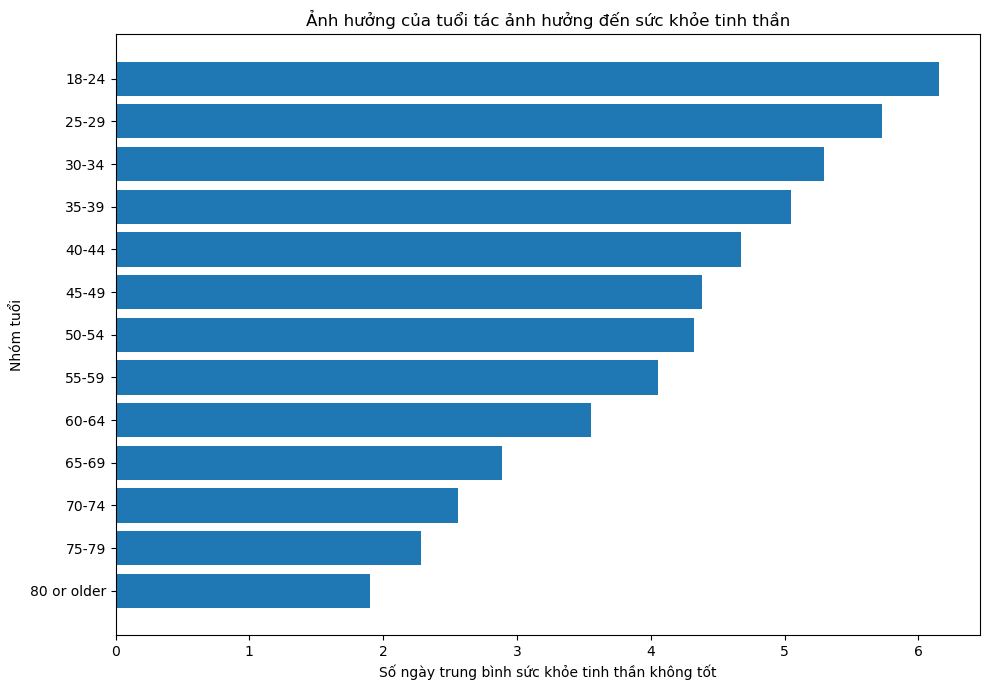

In [15]:
physical_health_data = df.groupby("AgeCategory")["MentalHealth"].mean().sort_index(ascending=False)

plt.figure(figsize=(10,7))

plt.barh(physical_health_data.index, physical_health_data.values)
plt.title("Ảnh hưởng của tuổi tác ảnh hưởng đến sức khỏe tinh thần")
plt.xlabel("Số ngày trung bình sức khỏe tinh thần không tốt")
plt.ylabel("Nhóm tuổi")

plt.tight_layout()
plt.show()


#### **Nhận xét**
#### Tổng quan
- Biểu đồ cột trên cho thấy một xu hướng khá rõ ràng: Số ngày trung bình cảm thấy sức khỏe tinh thần không tốt giảm dần theo tuổi tác. Điều này nghĩa là, nhìn chung, người trẻ tuổi (18-24) thường cảm thấy sức khỏe tinh thần không tốt hơn so với người cao tuổi (80 tuổi trở lên).

#### Phân tích chi tiết
- Nhóm tuổi 18-24: Nhóm này có số ngày trung bình cảm thấy sức khỏe tinh thần không tốt cao nhất. Điều này có thể giải thích do áp lực học tập, thi cử, các mối quan hệ xã hội phức tạp ở độ tuổi này.

- Nhóm tuổi từ 30-64: Các nhóm tuổi này có số ngày trung bình cảm thấy sức khỏe tinh thần không tốt giảm dần đều. Điều này cho thấy sức khỏe tinh thần có xu hướng cải thiện khi con người bước vào giai đoạn trưởng thành và ổn định cuộc sống.

- Nhóm tuổi 65 trở lên: Nhóm này có số ngày trung bình cảm thấy sức khỏe tinh thần không tốt thấp nhất. Có thể do người cao tuổi đã nghỉ hưu, có nhiều thời gian rảnh rỗi, hệ thống hỗ trợ xã hội vững chắc hơn, và đã trải qua nhiều kinh nghiệm sống nên có khả năng đối phó với stress tốt hơn.

#### Nguyên nhân có thể
- Áp lực cuộc sống: Người trẻ tuổi thường phải đối mặt với nhiều áp lực trong học tập, công việc, các mối quan hệ xã hội.

- Thay đổi sinh lý: Khi lớn tuổi, cơ thể trải qua nhiều thay đổi về hormone, có thể ảnh hưởng đến tâm trạng và cảm xúc.

- Kinh nghiệm sống: Người lớn tuổi thường có nhiều kinh nghiệm sống, giúp họ đối phó với khó khăn tốt hơn và có cái nhìn lạc quan hơn về cuộc sống.

- Hệ thống hỗ trợ xã hội: Người cao tuổi thường có gia đình, bạn bè quan tâm, tạo cảm giác an toàn và được hỗ trợ.

#### 3. Tỷ lệ mắc bệnh tiểu đường ở các chủng tộc khác nhau như thế nào? 

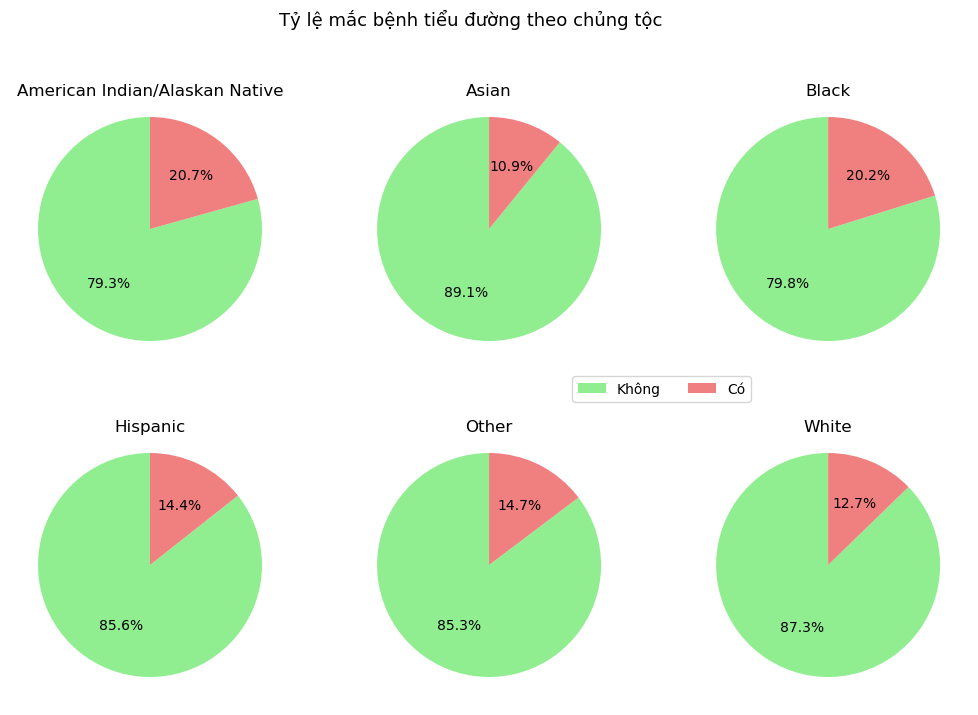

In [16]:
race_diabetic = df.groupby("Race")["Diabetic"].value_counts(normalize=True).unstack()
processed_race_diabetic = pd.DataFrame()
processed_race_diabetic["No"] = race_diabetic["No"] + race_diabetic["No, borderline diabetes"]
processed_race_diabetic["Yes"] = race_diabetic["Yes"] + race_diabetic["Yes (during pregnancy)"]

label = ["Không", "Có"]
color = ['lightgreen', 'lightcoral']

plt.figure(figsize=(15,8))
plt.suptitle('Tỷ lệ mắc bệnh tiểu đường theo chủng tộc', fontsize=13)

plt.subplot(2,3,1)
plt.pie(processed_race_diabetic.iloc[0], autopct='%1.1f%%', startangle=90, colors=color)
plt.title("American Indian/Alaskan Native", y=0.95)

plt.subplot(2,3,2)
plt.pie(processed_race_diabetic.iloc[1], autopct='%1.1f%%', startangle=90, colors=color)
plt.title("Asian", y=0.95)

plt.subplot(2,3,3)
plt.pie(processed_race_diabetic.iloc[2], autopct='%1.1f%%', startangle=90, colors=color)
plt.title("Black", y=0.95)
plt.legend(labels=label, bbox_to_anchor=(0.25, 0), ncol=2)

plt.subplot(2,3,4)
plt.pie(processed_race_diabetic.iloc[3], autopct='%1.1f%%', startangle=90, colors=color)
plt.title("Hispanic", y=0.95)

plt.subplot(2,3,5)
plt.pie(processed_race_diabetic.iloc[4], autopct='%1.1f%%', startangle=90, colors=color)
plt.title("Other", y=0.95)

plt.subplot(2,3,6)
plt.pie(processed_race_diabetic.iloc[5], autopct='%1.1f%%', startangle=90, colors=color)
plt.title("White", y=0.95)

plt.subplots_adjust(wspace=-0.3)
plt.show()


#### **Nhận xét**
#### Nhận xét chung
- Biểu đồ cho thấy có sự khác biệt đáng kể về tỷ lệ mắc bệnh tiểu đường giữa các chủng tộc.

- Người Mỹ bản địa và người da đen có tỷ lệ mắc bệnh cao nhất (20.7% và 20.2%): Cả hai nhóm này đều có tỷ lệ người mắc bệnh tiểu đường cao hơn đáng kể so với các nhóm chủng tộc khác.

- Người châu Á và người da trắng có tỷ lệ mắc bệnh thấp nhất (10.9% và 12.7%): Hai nhóm này có tỷ lệ người mắc bệnh tiểu đường thấp hơn so với các nhóm còn lại.

- Người Hispanic và người thuộc nhóm khác (14.4% và 14.7%): Tỷ lệ mắc bệnh của hai nhóm này nằm ở mức trung bình, cao hơn người châu Á và người da trắng nhưng thấp hơn người Mỹ bản địa và người da đen.

#### Các yếu tố có thể ảnh hưởng
- Yếu tố di truyền: Một số nghiên cứu cho thấy có sự khác biệt về gen giữa các chủng tộc, có thể ảnh hưởng đến nguy cơ mắc bệnh tiểu đường.

- Môi trường sống: Điều kiện sống, chế độ ăn uống, lối sống cũng đóng vai trò quan trọng trong việc quyết định nguy cơ mắc bệnh.

- Tiền sử gia đình: Nếu trong gia đình có người mắc bệnh tiểu đường, nguy cơ mắc bệnh của các thành viên khác sẽ cao hơn.

- Tiếp cận dịch vụ y tế: Khả năng tiếp cận dịch vụ y tế cũng ảnh hưởng đến việc phát hiện và điều trị bệnh tiểu đường.

#### 4. Tỷ lệ mắc bệnh tim ở các chủng tộc khác nhau như thế nào? 

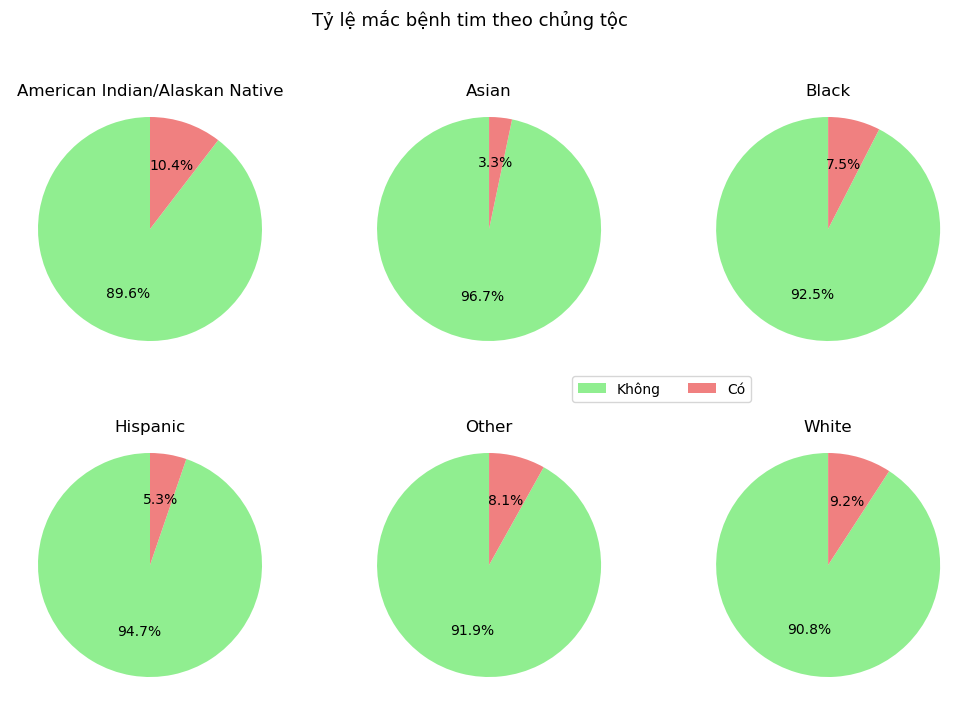

In [17]:
race_heart = df.groupby("Race")["HeartDisease"].value_counts(normalize=True).unstack()

label = ["Không", "Có"]
color = ['lightgreen', 'lightcoral']

plt.figure(figsize=(15,8))
plt.suptitle('Tỷ lệ mắc bệnh tim theo chủng tộc', fontsize=13)

plt.subplot(2,3,1)
plt.pie(race_heart.iloc[0], autopct='%1.1f%%', startangle=90, colors=color)
plt.title("American Indian/Alaskan Native", y=0.95)

plt.subplot(2,3,2)
plt.pie(race_heart.iloc[1], autopct='%1.1f%%', startangle=90, colors=color)
plt.title("Asian", y=0.95)

plt.subplot(2,3,3)
plt.pie(race_heart.iloc[2], autopct='%1.1f%%', startangle=90, colors=color)
plt.title("Black", y=0.95)
plt.legend(labels=label, bbox_to_anchor=(0.25, 0), ncol=2)

plt.subplot(2,3,4)
plt.pie(race_heart.iloc[3], autopct='%1.1f%%', startangle=90, colors=color)
plt.title("Hispanic", y=0.95)

plt.subplot(2,3,5)
plt.pie(race_heart.iloc[4], autopct='%1.1f%%', startangle=90, colors=color)
plt.title("Other", y=0.95)

plt.subplot(2,3,6)
plt.pie(race_heart.iloc[5], autopct='%1.1f%%', startangle=90, colors=color)
plt.title("White", y=0.95)

plt.subplots_adjust(wspace=-0.3)
plt.show()

#### **Nhận xét**
#### Nhận xét chung
- Rõ ràng có sự chênh lệch lớn về tỷ lệ mắc bệnh tim giữa các nhóm chủng tộc.

- Người Mỹ bản địa chịu ảnh hưởng nặng nề nhất: Nhóm này có tỷ lệ mắc bệnh tim cao nhất (10.4%), cho thấy họ đối mặt với rủi ro sức khỏe tim mạch lớn hơn so với các nhóm khác.

- Người châu Á có tỷ lệ mắc bệnh thấp nhất (3.3%), cho thấy họ có sức khỏe tim mạch tốt hơn.

- Người Hispanic, người thuộc nhóm khác, người da trắng và người da đen có tỷ lệ mắc bệnh nằm ở mức trung bình, tuy nhiên vẫn có sự khác biệt đáng kể so với người châu Á.

#### Các yếu tố ảnh hưởng
- Yếu tố di truyền: Một số nghiên cứu chỉ ra rằng gen di truyền có thể đóng vai trò quan trọng trong việc quyết định nguy cơ mắc bệnh tim.

- Môi trường sống: Điều kiện sống, chế độ ăn uống, mức độ ô nhiễm, và tiếp xúc với các chất độc hại đều có thể ảnh hưởng đến sức khỏe tim mạch.

- Lối sống: Hút thuốc, ít vận động, căng thẳng, và chế độ ăn uống không lành mạnh là những yếu tố nguy cơ chính gây bệnh tim.

- Tiếp cận dịch vụ y tế: Khả năng tiếp cận dịch vụ y tế chất lượng cao có thể ảnh hưởng đến việc phòng ngừa, phát hiện sớm và điều trị bệnh tim.

- Các yếu tố xã hội: Tình trạng kinh tế xã hội, giáo dục, và phân biệt đối xử cũng có thể ảnh hưởng đến sức khỏe tim mạch.

#### 5. Việc sử dụng đồ uống có cồn có ảnh hưởng tới thận ở các nhóm tuổi khác nhau không?  

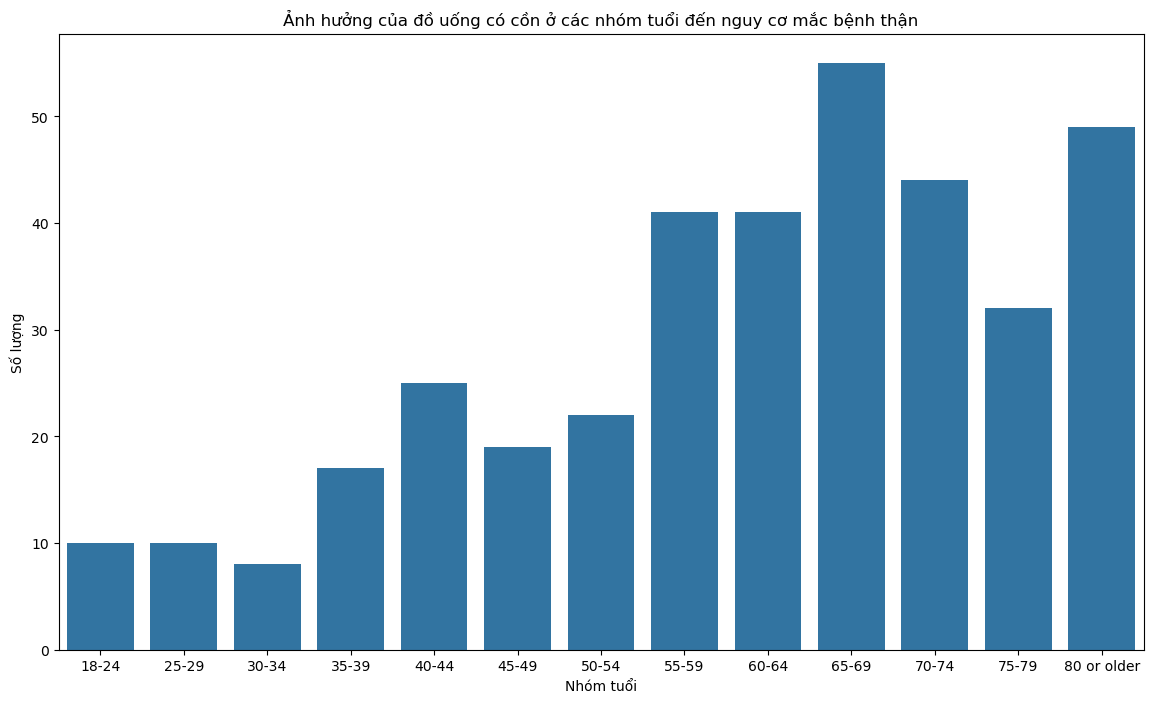

In [18]:
age_order = [
    '18-24', '25-29', '30-34', '35-39', '40-44', 
    '45-49', '50-54', '55-59', '60-64', '65-69', 
    '70-74', '75-79', '80 or older'
]

alcohol_heart_df = df[(df["AlcoholDrinking"] == "Yes") & (df["KidneyDisease"] == "Yes")]

plt.figure(figsize=(14,8))
sns.countplot(data=alcohol_heart_df,x="AgeCategory",order=age_order)
plt.title("Ảnh hưởng của đồ uống có cồn ở các nhóm tuổi đến nguy cơ mắc bệnh thận")
plt.xlabel("Nhóm tuổi")
plt.ylabel("Số lượng")

plt.show()


#### **Nhận xét**
#### Nhận xét chi tiết
- Tỷ lệ người mắc bệnh thận do rượu bia tăng từ nhóm tuổi trẻ (18-24) lên đến nhóm tuổi cao nhất (80 tuổi trở lên). Điều này cho thấy nguy cơ mắc bệnh càng cao khi tuổi tác càng lớn.

- Ở nhóm tuổi 75-79 và 80 tuổi trở lên, tỷ lệ người mắc bệnh tăng rất nhanh so với các nhóm tuổi khác. Điều này cho thấy tác động của rượu bia đối với sức khỏe thận ở người cao tuổi là rất nghiêm trọng.

- Từ độ tuổi 40 trở đi, tỷ lệ người mắc bệnh bắt đầu tăng lên đáng kể, cho thấy nguy cơ mắc bệnh tăng cao từ độ tuổi trung niên.

#### Nguyên nhân có thể:
- Sự suy giảm chức năng thận theo tuổi: Khi lớn tuổi, chức năng thận tự nhiên giảm sút, làm giảm khả năng lọc chất độc, bao gồm cả rượu bia.

- Sử dụng thuốc lâu dài: Người cao tuổi thường sử dụng nhiều loại thuốc khác nhau, một số loại thuốc này có thể tương tác với rượu bia, gây hại cho thận.

- Các bệnh lý kèm theo: Người cao tuổi thường mắc nhiều bệnh lý khác như tiểu đường, cao huyết áp, các bệnh về gan, làm tăng nguy cơ tổn thương thận khi sử dụng rượu bia.

- Lối sống không lành mạnh: Ngoài rượu bia, nhiều người cao tuổi còn có các thói quen không lành mạnh khác như hút thuốc, ít vận động, chế độ ăn uống không hợp lý, khiến cho tình trạng bệnh thận trở nên nghiêm trọng hơn.

#### 6. So sánh khả năng bị hen suyễn giữa nam và nữ?

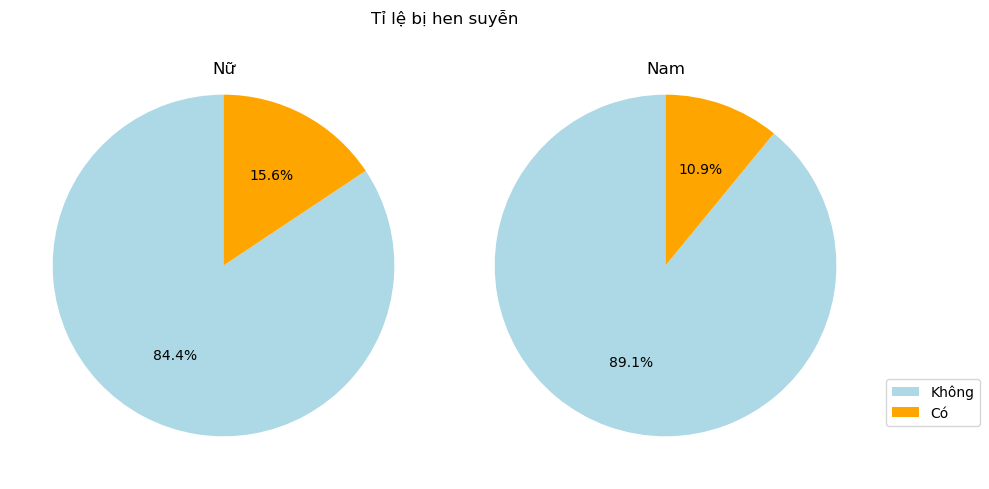

In [19]:
sex_asthma = pd.crosstab(df['Sex'], df['Asthma'])
sex_asthma_percentage = sex_asthma.div(sex_asthma.sum(axis=1),axis=0) * 100

female = sex_asthma_percentage.loc['Female']
male = sex_asthma_percentage.loc['Male']

label = ["Không","Có"]
plt.figure(figsize=(10,5))
plt.suptitle("Tỉ lệ bị hen suyễn",x=0.45)

plt.subplot(1,2,1)
plt.pie(female, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange'])
plt.title("Nữ",y=0.93)

plt.subplot(1,2,2)
plt.pie(male, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange'])
plt.title("Nam",y=0.93)

plt.legend(labels=label, bbox_to_anchor=(1,0.25), ncol=1)
plt.tight_layout()
plt.show()

#### **Nhận xét**
#### Kết quả chính
- Phụ nữ có tỷ lệ mắc hen suyễn cao hơn nam giới: Cụ thể, 15.6% phụ nữ trong khảo sát mắc bệnh hen suyễn, trong khi tỷ lệ này ở nam giới chỉ là 10.9%.

- Nam giới có tỷ lệ không mắc hen suyễn cao hơn: 89.1% nam giới trong khảo sát không mắc bệnh hen suyễn, so với 84.4% ở nữ giới.

#### Nguyên nhân có thể
- Yếu tố sinh học: Hormone, hệ miễn dịch và các yếu tố di truyền có thể đóng vai trò quan trọng trong việc phát triển bệnh hen suyễn ở phụ nữ.

- Yếu tố môi trường: Tiếp xúc với các chất gây dị ứng, ô nhiễm không khí, và các yếu tố kích thích khác có thể khác nhau giữa nam và nữ, dẫn đến sự khác biệt về tỷ lệ mắc bệnh.

- Yếu tố xã hội: Áp lực xã hội, lối sống, và các yếu tố tâm lý cũng có thể ảnh hưởng đến nguy cơ mắc bệnh hen suyễn ở cả nam và nữ.

#### 7. Tuổi tác có phải là yếu tố làm gia tăng nguy cơ mắc bệnh tim không?

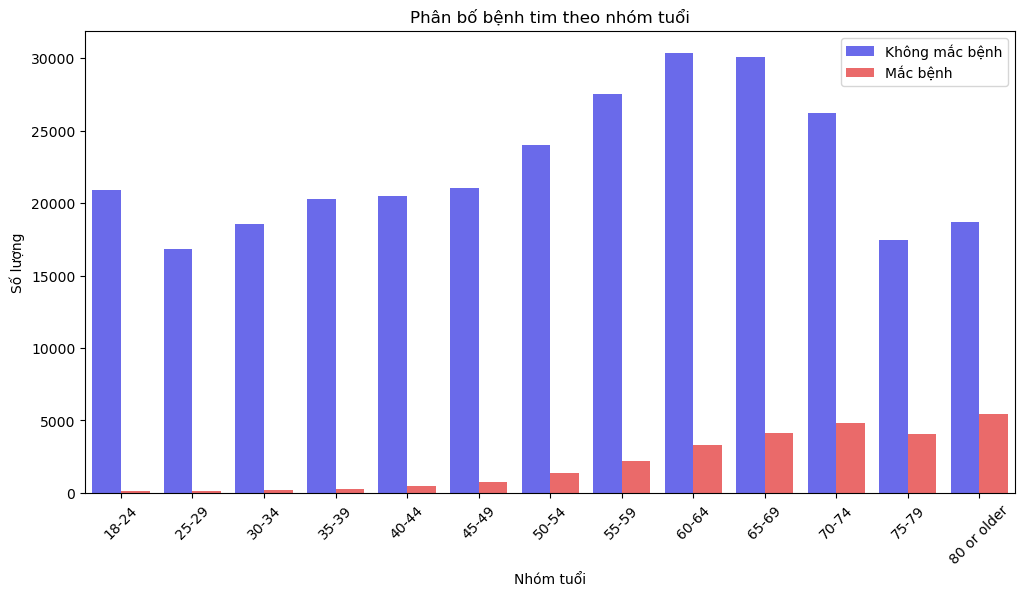

In [20]:
age_order = [
    '18-24', '25-29', '30-34', '35-39', '40-44', 
    '45-49', '50-54', '55-59', '60-64', '65-69', 
    '70-74', '75-79', '80 or older'
]

# Vẽ biểu đồ countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='AgeCategory', hue='HeartDisease', data=df, order=age_order, palette="seismic")
plt.title('Phân bố bệnh tim theo nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số lượng')
plt.legend(labels=["Không mắc bệnh","Mắc bệnh"])
plt.xticks(rotation=45)
plt.show()

#### **Nhận xét**
#### Nhận xét chi tiết
- Rõ ràng, số lượng người mắc bệnh tim tăng đáng kể khi bước vào độ tuổi trung niên và cao tuổi. Điều này cho thấy tuổi tác là một yếu tố nguy cơ quan trọng đối với bệnh tim.

- Ở các nhóm tuổi từ 60 trở lên, số lượng người mắc bệnh tim tăng vọt so với các nhóm tuổi trẻ hơn. Điều này cho thấy nguy cơ mắc bệnh tim ở người cao tuổi là rất cao.

- Mặc dù tỷ lệ mắc bệnh tim ở nhóm tuổi trẻ thấp hơn so với các nhóm tuổi khác, nhưng vẫn có một số trường hợp mắc bệnh. Điều này cho thấy các yếu tố nguy cơ như lối sống không lành mạnh, di truyền có thể gây ra bệnh tim ở ngay cả những người trẻ tuổi.

#### Nguyên nhân có thể:
- Sự lão hóa: Khi tuổi tác tăng lên, các cơ quan trong cơ thể, bao gồm cả tim, bắt đầu suy giảm chức năng, tăng nguy cơ mắc bệnh.

- Các yếu tố nguy cơ: Các yếu tố như huyết áp cao, cholesterol cao, tiểu đường, hút thuốc, béo phì, ít vận động tích lũy theo thời gian và tăng nguy cơ mắc bệnh tim.

- Bệnh lý kèm theo: Nhiều bệnh lý khác như viêm khớp, suy thận, ung thư cũng có thể làm tăng nguy cơ mắc bệnh tim.

#### 8. Thời lượng ngủ trung bình thay đổi như thế nào giữa các nhóm tuổi khác nhau?

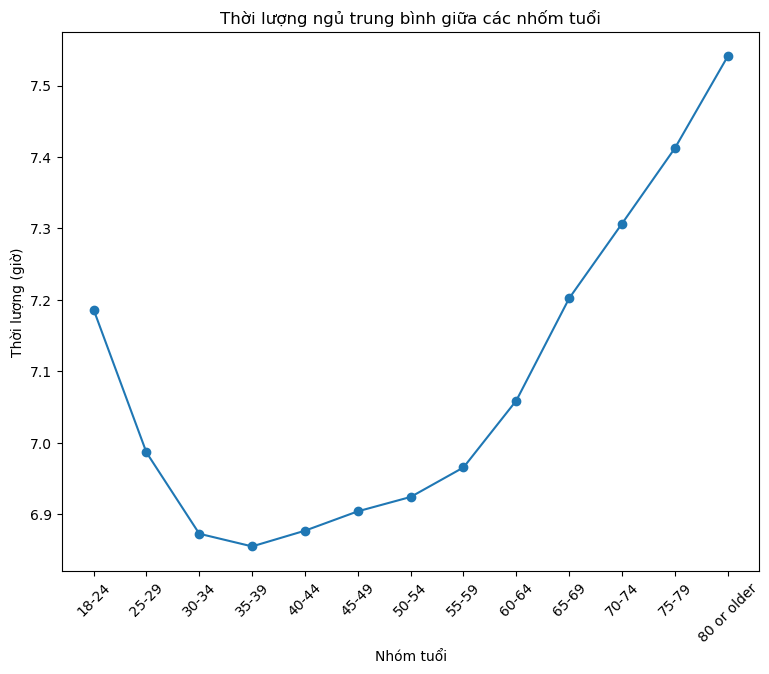

In [21]:
avg_sleeptime = df.groupby("AgeCategory")["SleepTime"].mean()

plt.figure(figsize=(9,7))
plt.plot(avg_sleeptime.index,avg_sleeptime.values,marker="o")
plt.title("Thời lượng ngủ trung bình giữa các nhốm tuổi")
plt.xlabel("Nhóm tuổi")
plt.ylabel("Thời lượng (giờ)")
plt.xticks(rotation=45)

plt.show()

#### **Nhận xét**
#### Nhận xét chi tiết
- Từ nhóm tuổi 18-24, thời lượng ngủ trung bình giảm khá nhanh cho đến độ tuổi 30-34. Điều này có thể giải thích bởi áp lực học tập, công việc và các hoạt động xã hội ở độ tuổi này.

- Từ 35-49 tuổi, thời lượng ngủ có xu hướng ổn định ở mức tương đối thấp.

- Tăng dần ở người cao tuổi: Bắt đầu từ độ tuổi 50 trở lên, thời lượng ngủ trung bình lại tăng lên đáng kể. Điều này cho thấy nhu cầu ngủ của con người tăng lên khi về già.

#### Giải thích các xu hướng
- Tuổi trẻ: Ở độ tuổi trẻ, nhu cầu về năng lượng và hoạt động cao hơn, dẫn đến thời gian ngủ ít hơn. Áp lực học tập, công việc và các hoạt động xã hội cũng khiến nhiều người thức khuya.

- Tuổi trung niên: Giai đoạn này, nhiều người phải đối mặt với nhiều áp lực trong công việc và gia đình, dẫn đến căng thẳng và khó ngủ.

- Tuổi cao: Khi về già, các hoạt động thể chất giảm, nhu cầu năng lượng cũng giảm theo, dẫn đến nhu cầu ngủ tăng lên. Tuy nhiên, một số bệnh lý mãn tính cũng có thể gây khó ngủ ở người cao tuổi.

#### 9. Sức khỏe tổng quan giữa các chủng tộc có sự khác biệt gì nổi bật? 

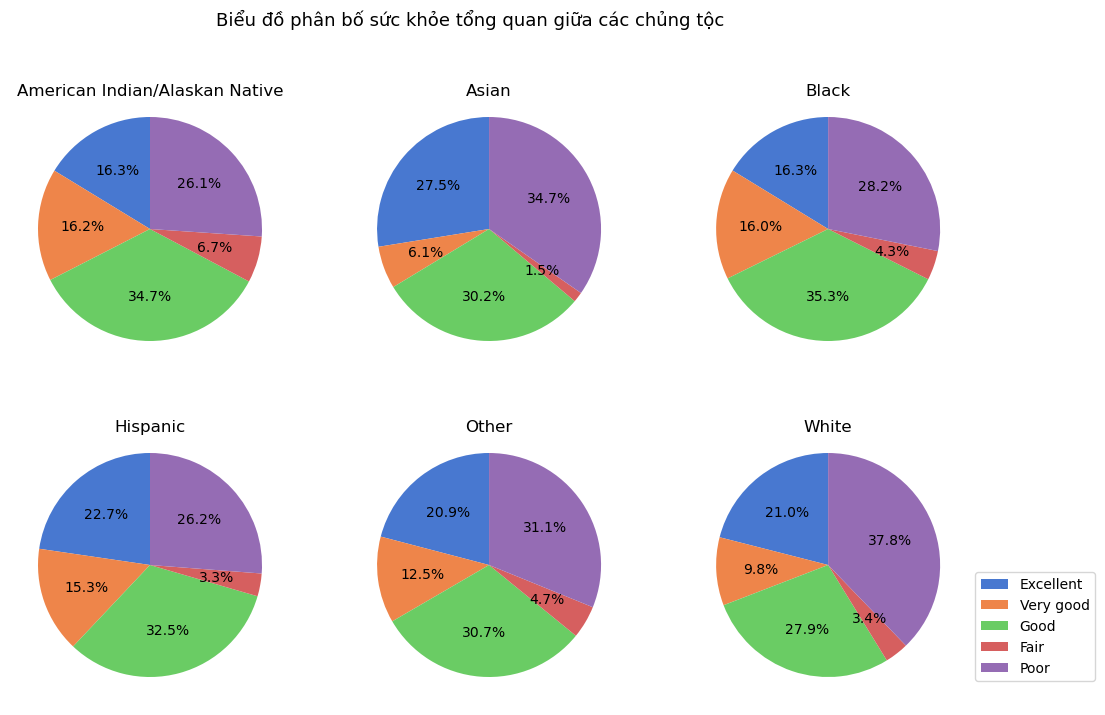

In [22]:
race_health = df.groupby("Race")["GenHealth"].value_counts(normalize=True).unstack()

label = ["Excellent", "Very good", "Good", "Fair", "Poor"]
color = sns.color_palette("muted")

plt.figure(figsize=(15,8))
plt.suptitle('Biểu đồ phân bố sức khỏe tổng quan giữa các chủng tộc', fontsize=13)

plt.subplot(2,3,1)
plt.pie(race_health.iloc[0], autopct='%1.1f%%', startangle=90, colors=color)
plt.title("American Indian/Alaskan Native", y=0.95)

plt.subplot(2,3,2)
plt.pie(race_health.iloc[1], autopct='%1.1f%%', startangle=90, colors=color)
plt.title("Asian", y=0.95)

plt.subplot(2,3,3)
plt.pie(race_health.iloc[2], autopct='%1.1f%%', startangle=90, colors=color)
plt.title("Black", y=0.95)

plt.subplot(2,3,4)
plt.pie(race_health.iloc[3], autopct='%1.1f%%', startangle=90, colors=color)
plt.title("Hispanic", y=0.95)

plt.subplot(2,3,5)
plt.pie(race_health.iloc[4], autopct='%1.1f%%', startangle=90, colors=color)
plt.title("Other", y=0.95)

plt.subplot(2,3,6)
plt.pie(race_health.iloc[5], autopct='%1.1f%%', startangle=90, colors=color)
plt.title("White", y=0.95)

plt.legend(labels=label, bbox_to_anchor=(1,0.5),ncol=1)
plt.subplots_adjust(wspace=-0.3)
plt.show()

#### **Nhận xét**
#### Nhận xét chung
- Có sự khác biệt đáng kể về tình trạng sức khỏe giữa các nhóm chủng tộc.

- Người Hispanic có tình hình sức khỏe tốt nhất: Nhóm này có tỷ lệ đánh giá sức khỏe ở mức "fair" và "poor" thấp, trong khi tỷ lệ đánh giá ở mức "excellent","very good" và "good" là khá cao.

- Người châu Á và người da trắng có tình hình sức khỏe kém nhất với tỷ lệ đánh giá ở mức "poor" là cao nhất (34.7% và 37.8%).

- Các nhóm khác có tình hình sức khỏe ở mức trung bình, tuy nhiên vẫn có sự khác biệt đáng kể giữa các nhóm.

#### Nguyên nhân có thể
- Yếu tố di truyền: Một số nghiên cứu cho thấy có sự khác biệt về gen giữa các chủng tộc, có thể ảnh hưởng đến sức khỏe.

- Môi trường sống: Điều kiện sống, tiếp cận dịch vụ y tế, ô nhiễm môi trường, dịch bệnh, chế độ ăn uống, và lối sống khác nhau giữa các nhóm chủng tộc có thể ảnh hưởng đến sức khỏe.

- Yếu tố xã hội: Tình trạng kinh tế xã hội, giáo dục, phân biệt đối xử cũng có thể ảnh hưởng đến sức khỏe.

- Tiếp cận dịch vụ y tế: Khả năng tiếp cận dịch vụ y tế chất lượng cao có thể khác nhau giữa các nhóm chủng tộc.

#### 10. Có mối liên hệ nào giữa giới tính và tỷ lệ đột quỵ không? 

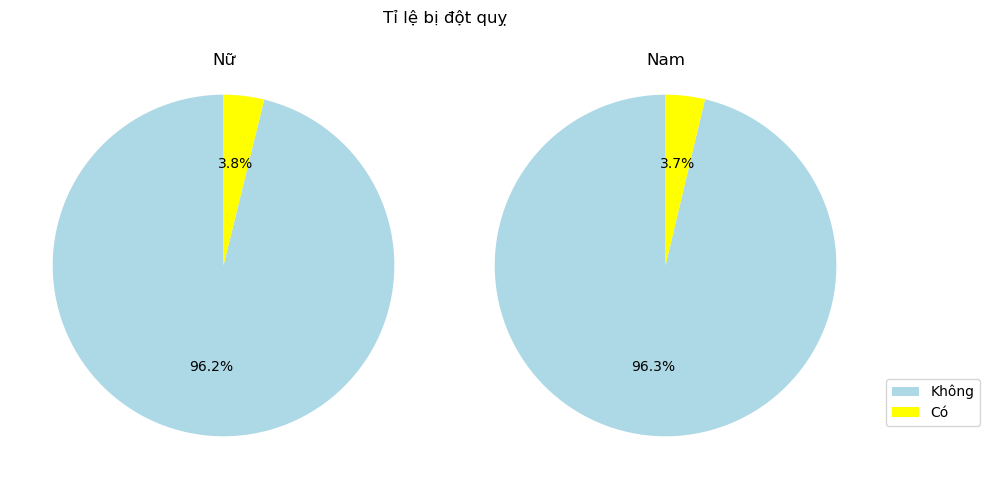

In [23]:
sex_stroke = pd.crosstab(df['Sex'], df['Stroke'])
sex_stroke_percentage = sex_stroke.div(sex_stroke.sum(axis=1),axis=0) * 100

female = sex_stroke_percentage.loc['Female']
male = sex_stroke_percentage.loc['Male']

label = ["Không","Có"]
plt.figure(figsize=(10,5))
plt.suptitle("Tỉ lệ bị đột quỵ",x=0.45)

plt.subplot(1,2,1)
plt.pie(female, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'yellow'])
plt.title("Nữ", y=0.95)

plt.subplot(1,2,2)
plt.pie(male, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'yellow'])
plt.title("Nam", y=0.95)

plt.legend(labels=label, bbox_to_anchor=(1,0.25), ncol=1)
plt.tight_layout()
plt.show()

#### **Nhận xét**
#### Nhận xét chi tiết
- Tỷ lệ đột quỵ thấp: Cả nam và nữ đều có tỷ lệ đột quỵ dưới 4%, cho thấy đây là một vấn đề sức khỏe không phổ biến.

- Sự khác biệt nhỏ: Sự khác biệt về tỷ lệ đột quỵ giữa nam và nữ là rất nhỏ, chỉ chênh lệch 0,1%. Điều này cho thấy giới tính không phải là yếu tố quyết định chính trong việc mắc bệnh đột quỵ.

#### Ý nghĩa của biểu đồ
- Biểu đồ cho thấy nguy cơ đột quỵ là tương đối đồng đều ở cả nam và nữ.

- Để hiểu rõ hơn về nguyên nhân gây đột quỵ, cần xem xét các yếu tố khác như tuổi tác, huyết áp, cholesterol, tiểu đường, hút thuốc, và lối sống.

- Mặc dù tỷ lệ đột quỵ không cao, nhưng việc phòng ngừa vẫn rất quan trọng để giảm thiểu nguy cơ mắc bệnh.

### __3. Góc nhìn về các yếu tố hành vi và thói quen sống (Behavioral and Lifestyle Factors)__
##### _Mục tiêu:_ Hiểu rõ hơn về cách các thói quen hàng ngày ảnh hưởng đến sức khỏe và các bệnh mãn tính.

#### 1. Mối liên hệ giữa thói quen hút thuốc, BMI và bệnh tim?

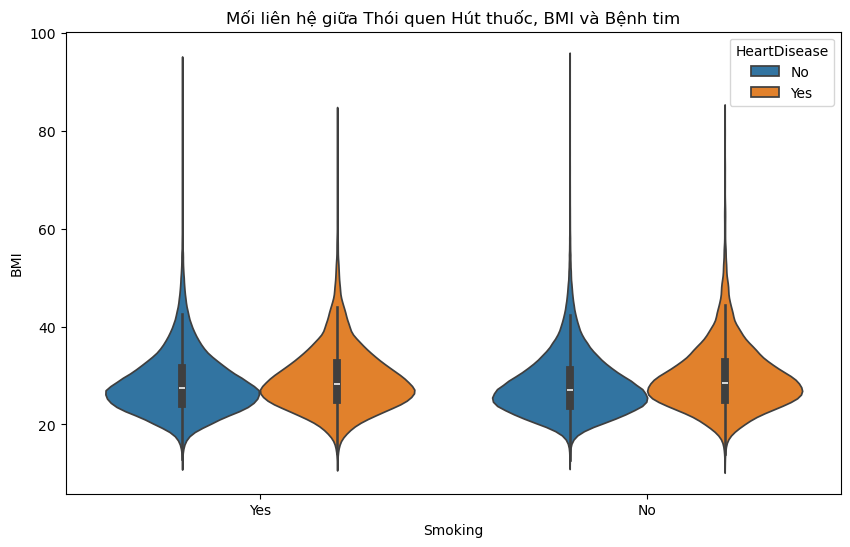

In [24]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Smoking', y='BMI', hue='HeartDisease', data=df, dodge=True)
plt.title('Mối liên hệ giữa Thói quen Hút thuốc, BMI và Bệnh tim')
plt.show()

#### *1.1 Sự phân bố BMI theo trạng thái hút thuốc và bệnh tim:*
- Nhìn chung, chỉ số BMI trải dài từ thấp đến cao ở cả hai nhóm (hút thuốc và không hút thuốc).
- Ở cả hai trạng thái hút thuốc (Yes và No), những người mắc bệnh tim (màu cam) có xu hướng chỉ số BMI tập trung cao hơn một chút so với những người không mắc bệnh tim (màu xanh).
#### *1.2 Ảnh hưởng của thói quen hút thuốc:*
- Đối với người không hút thuốc, hình dạng phân bố BMI cho thấy có phần tương tự với nhóm hút thuốc.
- Tuy nhiên, mức độ chênh lệch BMI giữa nhóm có bệnh tim và không có bệnh tim có vẻ rõ hơn ở nhóm không hút thuốc.
#### *1.3 Kết luận:*
- Thói quen hút thuốc dường như không làm thay đổi đáng kể phân bố BMI ở hai nhóm người có và không có bệnh tim.
- Chỉ số BMI cao có thể liên quan đến việc gia tăng nguy cơ mắc bệnh tim, bất kể người đó có hút thuốc hay không.

#### 2. Tác động của việc vận động thể chất đến tình trạng sức khỏe tổng quát

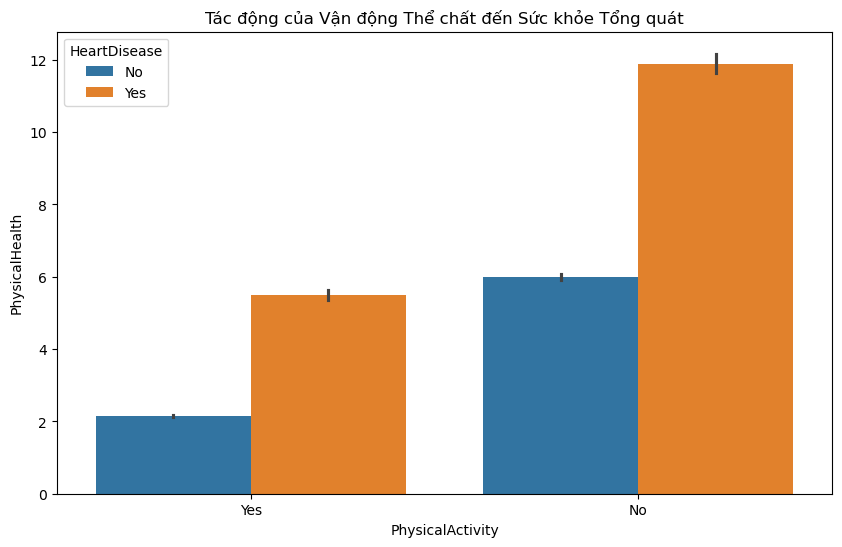

In [25]:
# Câu 2: Tác động của việc vận động thể chất đến tình trạng sức khỏe tổng quát (thay boxplot bằng barplot)
plt.figure(figsize=(10, 6))
sns.barplot(x='PhysicalActivity', y='PhysicalHealth', hue='HeartDisease', data=df)
plt.title('Tác động của Vận động Thể chất đến Sức khỏe Tổng quát')
plt.show()

#### *2.1 Sự khác biệt giữa nhóm có và không vận động thể chất:*
- Nhóm có vận động thể chất (Yes):
    - Những người không mắc bệnh tim (màu xanh) có mức sức khỏe tổng quát (PhysicalHealth) tốt hơn (chỉ số thấp hơn) so với những người mắc bệnh tim (màu cam).
- Nhóm không vận động thể chất (No):
    - Những người không mắc bệnh tim vẫn có sức khỏe tổng quát tốt hơn so với nhóm mắc bệnh tim, nhưng chênh lệch giữa hai nhóm này lớn hơn nhiều so với nhóm có vận động.
#### *2.2 Tác động của vận động thể chất:*
- Những người không vận động thể chất (No) có chỉ số sức khỏe tổng quát cao hơn đáng kể (thể hiện tình trạng sức khỏe kém hơn), đặc biệt ở nhóm mắc bệnh tim.
- Vận động thể chất có liên quan đến việc cải thiện sức khỏe tổng quát, ngay cả đối với những người mắc bệnh tim.
#### *2.3 Kết luận:*
- Vận động thể chất đóng vai trò quan trọng trong việc duy trì sức khỏe tổng quát, đặc biệt là ở những người mắc bệnh tim.
- Người không vận động thể chất có xu hướng sức khỏe tổng quát kém hơn, bất kể họ có mắc bệnh tim hay không.

#### 3. Ảnh hưởng của Giấc ngủ đến Sức khỏe Tâm lý (theo Bệnh tim)

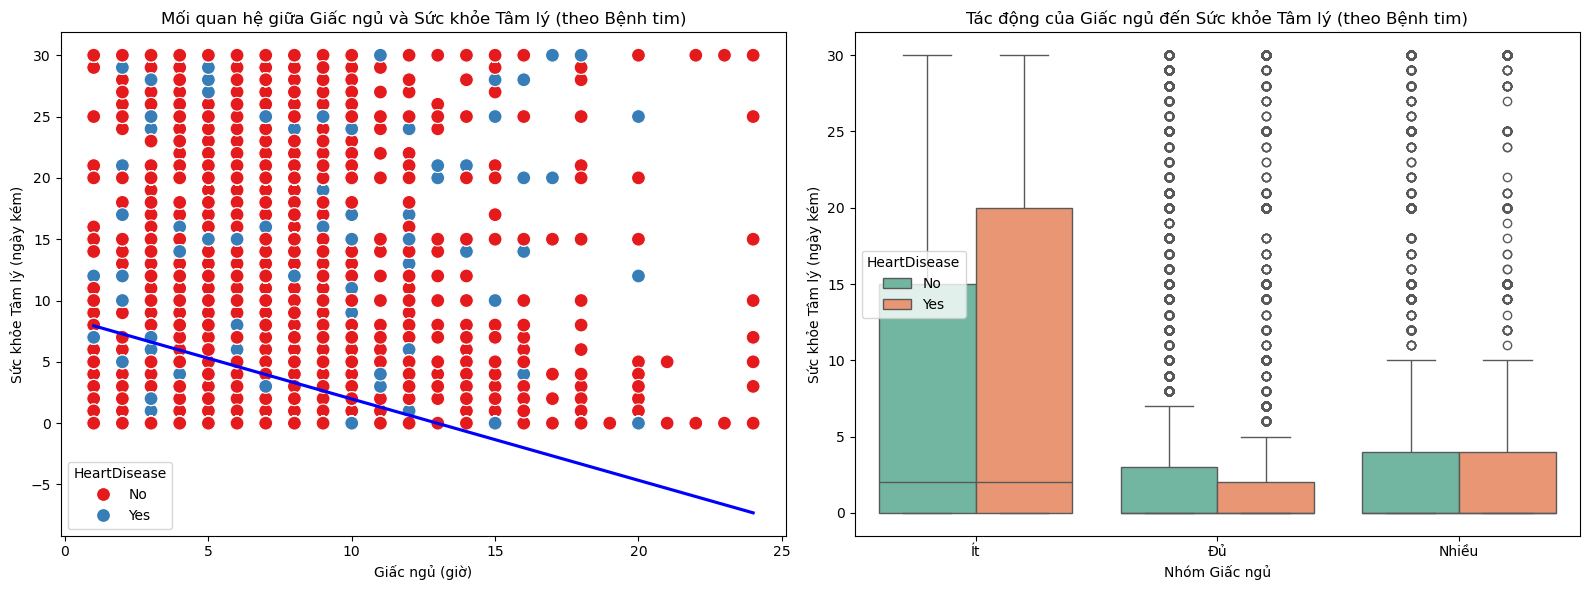

In [26]:
# Kết hợp Scatter plot và Boxplot trong một hình
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot với đường hồi quy
sns.scatterplot(ax=axes[0], x='SleepTime', y='MentalHealth', hue='HeartDisease', data=df, palette='Set1', s=100)
sns.regplot(ax=axes[0], x='SleepTime', y='MentalHealth', data=df, scatter=False, color='blue', ci=None)
axes[0].set_title('Mối quan hệ giữa Giấc ngủ và Sức khỏe Tâm lý (theo Bệnh tim)')
axes[0].set_xlabel('Giấc ngủ (giờ)')
axes[0].set_ylabel('Sức khỏe Tâm lý (ngày kém)')

# Boxplot để so sánh tình trạng sức khỏe tâm lý giữa các nhóm giấc ngủ
df['SleepCategory'] = pd.cut(df['SleepTime'], bins=[0, 5, 8, 24], labels=['Ít', 'Đủ', 'Nhiều'])
sns.boxplot(ax=axes[1], x='SleepCategory', y='MentalHealth', hue='HeartDisease', data=df, palette='Set2')
axes[1].set_title('Tác động của Giấc ngủ đến Sức khỏe Tâm lý (theo Bệnh tim)')
axes[1].set_xlabel('Nhóm Giấc ngủ')
axes[1].set_ylabel('Sức khỏe Tâm lý (ngày kém)')

# Tăng khoảng cách giữa các biểu đồ
plt.tight_layout()
plt.show()

#### *3.1 Biểu đồ bên trái:*
- Mối quan hệ giữa Giấc ngủ và Sức khỏe Tâm lý: Có vẻ như có một xu hướng giảm giữa số giờ ngủ và tình trạng sức khỏe tâm lý. Những điểm màu đỏ (No) cho thấy những người không có vấn đề về sức khỏe tâm lý thường có giờ ngủ nhiều hơn, trong khi những điểm màu xanh (Yes) cho thấy những người có vấn đề sức khỏe tâm lý thường ngủ ít hơn.
- Tính chất phân bố: Biểu đồ này cho thấy sự phân bố của các điểm dữ liệu, cho thấy rằng có sự khác biệt rõ rệt về giờ ngủ giữa hai nhóm.
#### *3.2 Biểu đồ bên phải:*
- Tác động của Giấc ngủ đến Sức khỏe Tâm lý: Biểu đồ hộp cho thấy sự khác biệt giữa những người có và không có bệnh tim. Nhóm "Yes" có thể có mức độ giấc ngủ thấp hơn so với nhóm "No", cho thấy giấc ngủ không đủ có thể liên quan đến sức khỏe tâm lý kém.
- Sự phân bố giữa các nhóm: Các hộp cho thấy sự khác biệt trong mức độ giấc ngủ giữa các nhóm "Có bệnh tim" và "Không có bệnh tim", với sự chồng chéo tối thiểu, điều này cho thấy rằng giấc ngủ có thể là một yếu tố quan trọng ảnh hưởng đến sức khỏe tâm lý.
#### *3.3 Kết luận:*
- Cả hai biểu đồ đều chỉ ra rằng giấc ngủ có thể ảnh hưởng đến sức khỏe tâm lý, và có thể có mối liên hệ giữa giấc ngủ kém và các vấn đề sức khỏe như bệnh tim. Những phát hiện này có thể quan trọng trong việc phát triển các biện pháp can thiệp nhằm cải thiện giấc ngủ và sức khỏe tâm lý cho cộng đồng.

#### 4. Tác động của rượu bia đến thời lượng ngủ hàng ngày?

C:\Users\hoang\AppData\Local\Temp\ipykernel_9556\2928119282.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df["AlcoholDrinking"], y = df["SleepTime"], palette="Set2")


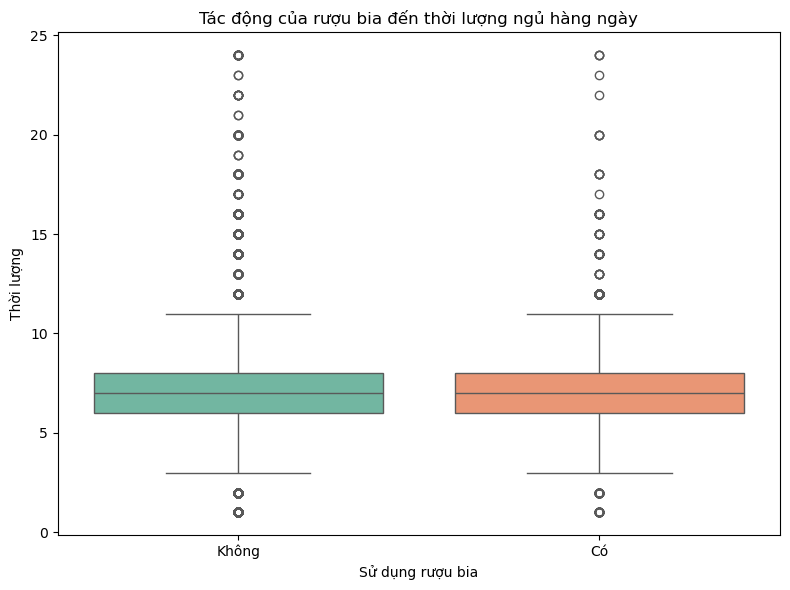

In [27]:
plt.figure(figsize=(8,6))

sns.boxplot(x = df["AlcoholDrinking"], y = df["SleepTime"], palette="Set2")
plt.title("Tác động của rượu bia đến thời lượng ngủ hàng ngày")
plt.xlabel("Sử dụng rượu bia")
plt.ylabel("Thời lượng")
plt.xticks(ticks=[0, 1], labels=["Không", "Có"])

plt.tight_layout()
plt.show()

#### **Nhận xét**
- Thời lượng ngủ trung bình của nhóm không sử dụng rượu bia và nhóm có sử dụng rượu bia tương đối giống nhau (thể hiện qua đường giữa của hộp).

- Phân bố thời lượng ngủ của hai nhóm không có sự khác biệt rõ rệt.

- Việc sử dụng rượu bia dường như không ảnh hưởng đáng kể đến thời lượng ngủ trung bình hàng ngày.

#### 5. Thời lượng ngủ có liên quan như thế nào tới đột quỵ?

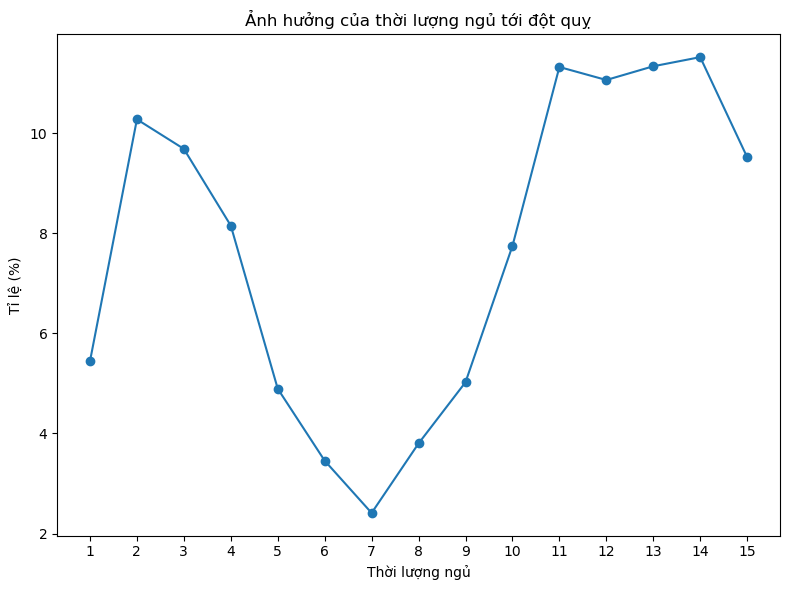

In [45]:
# Ta sẽ so sánh những người ngủ từ 1 -> 15 tiếng
sleep_stroke = pd.crosstab(df["SleepTime"],df["Stroke"])
sleep_stroke_percentage = sleep_stroke.div(sleep_stroke.sum(axis=1),axis=0) * 100

sleep_df = sleep_stroke_percentage.iloc[0:15]["Yes"]

plt.figure(figsize=(8,6))
plt.plot([str(int(i)) for i in sleep_df.index], sleep_df,marker="o")
plt.title("Ảnh hưởng của thời lượng ngủ tới đột quỵ")
plt.xlabel("Thời lượng ngủ")
plt.ylabel("Tỉ lệ (%)")
plt.tight_layout()
plt.show()

#### **Nhận xét**
#### Xu hướng chung:
- Tỉ lệ đột quỵ thấp nhất: Khi ngủ khoảng 7 giờ mỗi đêm. Đây có thể coi là khoảng thời gian ngủ lý tưởng để giảm thiểu nguy cơ đột quỵ.

- Tỉ lệ đột quỵ tăng: Khi thời lượng ngủ quá ngắn hoặc quá dài, tỉ lệ đột quỵ có xu hướng tăng lên. Điều này cho thấy việc ngủ quá ít hoặc quá nhiều đều không tốt cho sức khỏe và có thể làm tăng nguy cơ mắc bệnh đột quỵ.

#### Kết luận:
- Có một mối liên hệ rõ ràng giữa thời lượng ngủ và nguy cơ đột quỵ. 

- Để giảm thiểu nguy cơ đột quỵ, chúng ta nên cố gắng ngủ đủ 7-8 giờ mỗi đêm. 

- Tuy nhiên, đây chỉ là một yếu tố trong nhiều yếu tố ảnh hưởng đến nguy cơ đột quỵ. Các yếu tố khác như chế độ ăn uống, vận động, hút thuốc, huyết áp, cholesterol cũng đóng vai trò quan trọng.

#### 6. Liệu những người hút thuốc có thói quen uống rượu bia không?

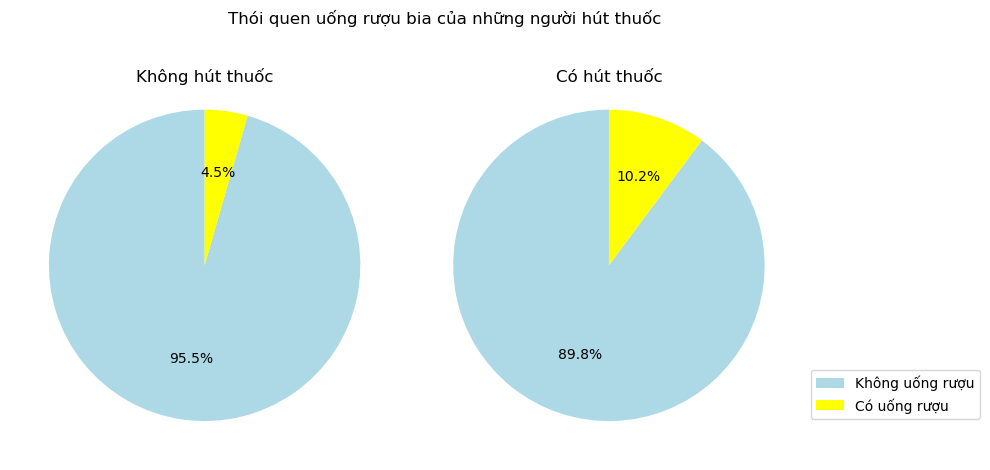

In [46]:
smoking_alcohol = pd.crosstab(df["Smoking"], df["AlcoholDrinking"])
smoking_alcohol_percentage = smoking_alcohol.div(smoking_alcohol.sum(axis=1),axis=0)

no_smoking = smoking_alcohol.loc['No']
yes_smoking = smoking_alcohol.loc['Yes']

label = ["Không uống rượu","Có uống rượu"]
plt.figure(figsize=(10,5))
plt.suptitle("Thói quen uống rượu bia của những người hút thuốc",x=0.45)

plt.subplot(1,2,1)
plt.pie(no_smoking, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'yellow'])
plt.title("Không hút thuốc", y=0.95)

plt.subplot(1,2,2)
plt.pie(yes_smoking, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'yellow'])
plt.title("Có hút thuốc", y=0.95)

plt.legend(labels=label, bbox_to_anchor=(1,0.25), ncol=1)
plt.tight_layout()
plt.show()

#### **Nhận xét**
#### Tổng quan
- Nhóm không hút thuốc: Phần lớn (95.5%) không uống rượu bia, chỉ có một tỷ lệ nhỏ (4.5%) có thói quen này.

- Nhóm có hút thuốc: Tỷ lệ người uống rượu bia cao hơn so với nhóm không hút thuốc (10.2%). Điều này cho thấy có mối liên hệ giữa việc hút thuốc và việc uống rượu bia.

#### Nhận xét chi tiết
- Hút thuốc và uống rượu thường đi kèm: Việc một tỷ lệ đáng kể người hút thuốc cũng có thói quen uống rượu bia cho thấy hai hành vi này có thể có mối liên hệ. Có thể có nhiều yếu tố giải thích cho điều này, chẳng hạn như:

    + Ảnh hưởng xã hội: Trong một số nhóm xã hội, việc hút thuốc và uống rượu thường đi kèm với nhau.

    + Căng thẳng: Cả thuốc lá và rượu đều có thể được sử dụng để đối phó với căng thẳng, lo âu.

    + Các yếu tố tâm lý: Có thể có những yếu tố tâm lý chung khiến một người có xu hướng cả hút thuốc và uống rượu.

- Nguy cơ sức khỏe: Việc kết hợp cả hút thuốc và uống rượu làm tăng đáng kể nguy cơ mắc nhiều bệnh mãn tính như ung thư, bệnh tim mạch, gan, và các vấn đề sức khỏe khác.